In [ ]:
pip install citipy

In [1]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
import random


In [3]:
# Import the NumPy module.
import numpy as np

In [4]:
np.random.uniform(-90.000, 90.000)

-18.31951816761432

In [5]:
# Import timeit.
import timeit

In [6]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

15.4 µs ± 274 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
def latitudes(size):
    latitudes =[]
    x=0
    while x<(size):
        random_lat = random.randint(-90, 90)+random.random()
        latitudes.append(random_lat)
        x+=1
    return latitudes

# call the function with 1500
%timeit latitudes(1500)
print("check")

2.87 ms ± 339 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
check


In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [10]:
# Add the latitudes and longitudues to a list
coordinates = list(lat_lngs)


In [11]:
# Create a list for holding the citiees
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

623

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Parse a response from an API

For each city in our lats_lngs list, we need to retrieve the following data and add it to a DataFrame:

City, country, and date
Latitude and longitude
Maximum temperature
Humidity
Cloudiness
Wind speed

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
print(city_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=591679f7c4f2de475d86824b8e92806d&q=Boston


In [16]:
# get JSON object
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 87.15,
  'feels_like': 85.87,
  'temp_min': 84.99,
  'temp_max': 90,
  'pressure': 1017,
  'humidity': 45},
 'visibility': 16093,
 'wind': {'speed': 10.29, 'deg': 200, 'gust': 16.11},
 'clouds': {'all': 40},
 'dt': 1592599289,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592557633,
  'sunset': 1592612650},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data
boston_data = city_weather.json()

In [18]:
boston_data["id"]

4930956

In [19]:
boston_data["dt"]

1592599289

In [20]:
boston_data["coord"]["lat"]

42.36

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 90 45 40 10.29


In [22]:
# get teh date from the JSON file
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 19, 20, 41, 29)

In [23]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-19 20:41:29'

# Pseudocode for how we will get the weather data for each city for the website.
We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.

2. Loop through the cities list.

3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
     
4. Build the city_url or endpoint for each city.

5. Log the URL and the record and set numbers.

6. Make an API request for each city.

7. Parse the JSON weather data for the following:
    City, country, and date
    Latitude and longitude
    Maximum temperature
    Humidity
    Cloudiness
    Wind speed
    
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.


# Import Dependencies, and Initialize an Empty List and Counters

In [24]:
# Create an emplty list to hold the weather data

city_data = []

# Print the beginning of the logging
print("Beginning Data Retrival   ")
print("--------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrival   
--------------------------


In [25]:
# Loop Through the List of Cities and Build the City URL
for i,  city in enumerate(cities):
    
    # Group cities in the sets for 50 logging purposes
    if(i% 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tramore
Processing Record 2 of Set 1 | egvekinot
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | gairo
Processing Record 5 of Set 1 | berlevag
Processing Record 6 of Set 1 | warqla
City not found. Skipping...
Processing Record 7 of Set 1 | tandil
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | labuhan
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | kaka
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | mongo
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | zyryanka
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | bathsheba
Processing Record 20 of Set 1 | morant bay
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | yellowknife
Processing Record 

Processing Record 39 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 40 of Set 4 | shibetsu
Processing Record 41 of Set 4 | carmona
Processing Record 42 of Set 4 | saryshagan
City not found. Skipping...
Processing Record 43 of Set 4 | dakoro
Processing Record 44 of Set 4 | catuday
Processing Record 45 of Set 4 | forquilhinha
Processing Record 46 of Set 4 | dikson
Processing Record 47 of Set 4 | emporia
Processing Record 48 of Set 4 | ust-kuyga
Processing Record 49 of Set 4 | star
Processing Record 50 of Set 4 | brae
Processing Record 1 of Set 5 | lorengau
Processing Record 2 of Set 5 | wanaka
Processing Record 3 of Set 5 | riga
Processing Record 4 of Set 5 | hualmay
Processing Record 5 of Set 5 | bonthe
Processing Record 6 of Set 5 | voi
Processing Record 7 of Set 5 | lagoa
Processing Record 8 of Set 5 | ati
Processing Record 9 of Set 5 | flin flon
Processing Record 10 of Set 5 | nikolskoye
Processing Record 11 of Set 5 | albert lea
Processing Record 12 of Set 5 

Processing Record 32 of Set 8 | santa teresa
Processing Record 33 of Set 8 | svetlyy
Processing Record 34 of Set 8 | aripuana
Processing Record 35 of Set 8 | saint-georges
Processing Record 36 of Set 8 | providencia
Processing Record 37 of Set 8 | tateyama
Processing Record 38 of Set 8 | coihaique
Processing Record 39 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 8 | walvis bay
Processing Record 41 of Set 8 | saint-francois
Processing Record 42 of Set 8 | saint-philippe
Processing Record 43 of Set 8 | mumford
Processing Record 44 of Set 8 | cidreira
Processing Record 45 of Set 8 | honningsvag
Processing Record 46 of Set 8 | termoli
Processing Record 47 of Set 8 | potosi
Processing Record 48 of Set 8 | riberalta
Processing Record 49 of Set 8 | anar darreh
City not found. Skipping...
Processing Record 50 of Set 8 | dukat
Processing Record 1 of Set 9 | kalmunai
Processing Record 2 of Set 9 | attawapiskat
City not found. Skipping...
Processing Record 3 of Se

Processing Record 20 of Set 12 | kenai
Processing Record 21 of Set 12 | maxixe
Processing Record 22 of Set 12 | octeville
Processing Record 23 of Set 12 | limbuhan
Processing Record 24 of Set 12 | ust-nera
Processing Record 25 of Set 12 | westport
Processing Record 26 of Set 12 | carauari
Processing Record 27 of Set 12 | nantucket
Processing Record 28 of Set 12 | lethem
Processing Record 29 of Set 12 | esperance
Processing Record 30 of Set 12 | palu
Processing Record 31 of Set 12 | kitros
Processing Record 32 of Set 12 | toowoomba
Processing Record 33 of Set 12 | halalo
City not found. Skipping...
Processing Record 34 of Set 12 | bosaso
Processing Record 35 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 36 of Set 12 | ascension
Processing Record 37 of Set 12 | san vicente
Processing Record 38 of Set 12 | seredka
Processing Record 39 of Set 12 | sao miguel do araguaia
Processing Record 40 of Set 12 | mendi
Processing Record 41 of Set 12 | camargo
Processing Record 4

In [26]:
len(city_data)

578

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tramore,52.16,-7.15,57.99,82,40,10.29,IE,2020-06-19 20:41:49
1,Egvekinot,66.32,-179.17,56.46,40,51,1.21,RU,2020-06-19 20:39:27
2,Ushuaia,-54.80,-68.30,37.40,86,75,3.51,AR,2020-06-19 20:41:49
3,Gairo,39.85,9.50,62.44,59,29,3.85,IT,2020-06-19 20:41:49
4,Berlevag,70.86,29.09,42.80,75,90,12.75,NO,2020-06-19 20:41:49
5,Tandil,-37.32,-59.13,55.99,70,19,1.01,AR,2020-06-19 20:41:04
6,Labuhan,-6.88,112.21,75.81,87,96,8.55,ID,2020-06-19 20:41:50
7,College,64.86,-147.80,57.20,87,90,8.05,US,2020-06-19 20:41:50
8,Kaka,37.35,59.61,80.53,16,0,8.28,TM,2020-06-19 20:41:50
9,Port Elizabeth,-33.92,25.57,53.60,71,0,3.36,ZA,2020-06-19 20:40:06


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tramore,IE,2020-06-19 20:41:49,52.16,-7.15,57.99,82,40,10.29
1,Egvekinot,RU,2020-06-19 20:39:27,66.32,-179.17,56.46,40,51,1.21
2,Ushuaia,AR,2020-06-19 20:41:49,-54.80,-68.30,37.40,86,75,3.51
3,Gairo,IT,2020-06-19 20:41:49,39.85,9.50,62.44,59,29,3.85
4,Berlevag,NO,2020-06-19 20:41:49,70.86,29.09,42.80,75,90,12.75
5,Tandil,AR,2020-06-19 20:41:04,-37.32,-59.13,55.99,70,19,1.01
6,Labuhan,ID,2020-06-19 20:41:50,-6.88,112.21,75.81,87,96,8.55
7,College,US,2020-06-19 20:41:50,64.86,-147.80,57.20,87,90,8.05
8,Kaka,TM,2020-06-19 20:41:50,37.35,59.61,80.53,16,0,8.28
9,Port Elizabeth,ZA,2020-06-19 20:40:06,-33.92,25.57,53.60,71,0,3.36


In [29]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV 
city_data_df.to_csv(output_data_file, index_label='City_ID')

# Modify the .gitignore File.

In [30]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Tramore,IE,2020-06-19 20:41:49,52.16,-7.15,57.99,82,40,10.29
1,1,Egvekinot,RU,2020-06-19 20:39:27,66.32,-179.17,56.46,40,51,1.21
2,2,Ushuaia,AR,2020-06-19 20:41:49,-54.80,-68.30,37.40,86,75,3.51
3,3,Gairo,IT,2020-06-19 20:41:49,39.85,9.50,62.44,59,29,3.85
4,4,Berlevag,NO,2020-06-19 20:41:49,70.86,29.09,42.80,75,90,12.75
5,5,Tandil,AR,2020-06-19 20:41:04,-37.32,-59.13,55.99,70,19,1.01
6,6,Labuhan,ID,2020-06-19 20:41:50,-6.88,112.21,75.81,87,96,8.55
7,7,College,US,2020-06-19 20:41:50,64.86,-147.80,57.20,87,90,8.05
8,8,Kaka,TM,2020-06-19 20:41:50,37.35,59.61,80.53,16,0,8.28
9,9,Port Elizabeth,ZA,2020-06-19 20:40:06,-33.92,25.57,53.60,71,0,3.36


In [31]:
city_data_df.count()

City_ID       578
City          578
Country       573
Date          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
dtype: int64

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
import time

# Plot Latitude vs Temperature

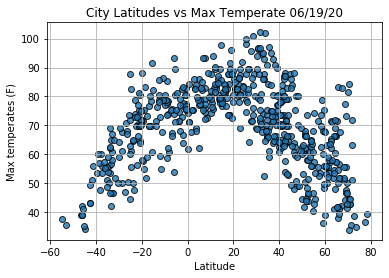

In [34]:
# Build scatter plot for Latitude vs Temperature
plt.scatter(lats,max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph prdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEWCAYAAACJ0YulAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOydeXyUxfnAv7P3bjabZMlNEoIEkKsgIqACghYFT7QeFYsWK6A/j6ptpbWoeLViK1qLrYrVeiHihQcGtSgKKsghyhkIEI6EXITN5tjNXvP7491dNmFzkoQE3+/nk09232PmmXnfnWfmeWaeEVJKVFRUVFRUADQnWgAVFRUVla6DqhRUVFRUVMKoSkFFRUVFJYyqFFRUVFRUwqhKQUVFRUUljKoUVFRUVFTCqErhBCKEuFcI8cKJlqMh7S2XEGKuEOK19kpPRUWl41CVQgcjhJgqhFgvhKgWQhwSQuQKIcYASCn/IqW8KXhdthBCCiF0bczn10KI1W24b7wQ4mDksfaUqysTUbaNDY4nCiE8QoiCds7v3uB7UC2EcAsh/BHft7ZnXp2NEOJmIcT/jjONG4QQ+4P18bYQIq7B+euFEHlCiBohRL4QYlSD8w8JIe4XQsQIId4RQuwLPt/RDa6zCyFeF0KUCSFKhBD3RpHlXCHE50KIdCHEkuBvt1II8ZUQ4vTWyN3dUJVCByKEuBt4CvgLkAJkAf8CLjuRcqkcQ4wQYnDE96nA3vbOJKhsrVJKK3Az8G3ou5RyUHvn1150RodACHEa8DRwDZAGCOAfEecvBuYC1wFWYAKwv0EyFwIfAxL4EuU5HomS3TPBa7KAs4FZQohrG0krFlgNDAPswFvAMiGEsSVyd0uklOpfB/wBcUA1cFUT18wFXgt+3o/yolYH/84BKoAhEdcnAy4gKUpavwZWN5LPdGA7UAXsAWYFj8cE0wtE5JvejFxnRp4PXpMdvEYX/N4b5UdZBXwGLGhw/WjgG8AB/ACMb1COPcF79wLXRSlPelBue8Sx04ByQA/kBPOvDB57s5F6Cck9B/hbxPH1wJ+BgohjfwR2B+XaBlwece7fwNsR3+cBKwDRxLOP+ryAwcDnKI3ZdmBKxLnFKA3OZ0ANsDL4TvwrWJdbG7wvxcA9wI7gu/Q8YIw4fznwY/DeVcDABvf+PphmbfDY/cFnUgVsAS6KqHs34Au+I8XB42aUTtGBYHr/jMy/QbnnAy9GfB8UfMam4PeN0d6FiOtTgEMN6zz4/Ec3OFbVoJ4eAj5rcM22yPqIOC6CZR3UErm74586Uug4zgRMwHstvH5c8H+8VHqOX6I0Ar+KuOZa4H9SyrJWylIKXAzYUBTEk0KI4VLKGmAyUCSP9liLmpHr2xbktwjYACQCDwM3hE4IIXoCy4BHUHpevwfeEUIkCSFiUHpdk6WUscBZwKaGiQdl/Bb4RcThqSgNszeY56dAApCB0hg1xWvAL4UQWiHEAJTe4doG1+wGxqIo+weB14QQacFzvwN+FjThjQV+A9wgg61ESxFC2FAa/P+g1N31wItCiJyIy65BqbNEQAesQVGAPVB6to83SPZa4FygP0rj/YdgXqNRlMn04L2vAksbjAquASYGzwPkoTyTOBTFt1gIkSil/B64E1gZfEdSg9c/iVL/Q4L590NRrtEYhNJBAEBKuRXQAn2CvfJhQLoQYo8Q4oAQ4slQbz3IZGB5K+pcNPgcHikKIbIBs5RyW5T7RgF+jo4kG5W7hXJ0OVSl0HH0AMqllL7jSONlYKoQIvScpqH8eFuFlHKZlHK3VPgSpcEcexxyNYoQIgs4A7hPSlknpfwK+DDikl8BH0spP5ZSBqSUn6H0zC8Mng8Ag4UQZinloeCPLBqLUBo8hBAC+GXwGIAX6AWkSyndUsrmfC0HURq8n6MosFcaXiClfEtKWRSU+U1gFzAyeK42WK75KArmdinlwYZptIDLgS1SytellH4p5TqUuotUfm9JKX+QUrqA94FKKeWbUko/sASl4Y/kH0G5y4C/EqwzYBawQEq5IZjX84ARiLSXPxm81xUs55vBZxKQUr4KFDa4PkxQudwI/FZK6ZBSVgKPoTynaFhRRnaRVKEo6J4oDfcVKKPMEShmn3sirr0IRSm2hE+APwV9D/1RnrmlubSEEAnAf4E5wWfenNzdElUpdByHgcTjscdKKdeimAnOEUKcimIW+aC16QghJgsh1gghKoQQDpQGOLGtcjVDOnAkOAoJsS/icy/gKiGEI/QHjAHSgvdcg2JvPySEWBYsdzTeBs4UQqSjjGYkigkElMZCAN8JIbYKIW5sgdyvoJh0rkVp2OsRdHJuipB5MBF1KKX8DsXsJVAa57bQCxjXoG5+gWKrDlES8dkV5bu1QZoHIj7vQ3k+obzubZBXEkoDHO1ehBC/EUL8GHF9Do2/R+koprytEdcvRTF3RaMaZSQbSSxKA+sKfn9KSlkqpSxBMaNdGJRLB4xH6ey0hFtQ2r49KD6C11E6BiFC/oQwQghr8NhnUsonWyh3t+Skm1HShfgWxfY4BaUBa47Ghr0vo/RCi1HMI+7WCBEcYr+DYop4X0rpFUIs5ejwubnhdrTzNdTvWaVGfD4EJAghYiIUQ1ZEOgeAV6WUM6JmJuUnwCdCCDOKiWkhUUY1UkqHEOJT4GpgAPBGyHQgpSwGZgAIZabX/4QQX0kp85so5zsovo8NUsp9Qoi+oRNCiF5BOc5DcQ77hRCbiDBBCCFuRelpF6Eopb82kVdjHAA+lVJe0oZ7GyMz4nMWinyhvJZJKZ9o4t7wsxdC9EMxw50LfCelDAghdtD4e3QIxcfQR0p5uAVybgWGRuQ3EMVMs1tK6RZClEfJI8TZwNbgaKRZgqOmayLymg98F/xsQhmNXBlx3owyYtsB3NFSuVsiS1dEHSl0EMEX9H7gGSHEFCGERQihD/baG9p9AcpQTCenNDj+KopZ4VdEMWs0QAghTJF/gAGlsSoDfEKIycD5EfeUAD2amEYXTa5NKD3arOB9f4oo9z4Uc9CDQghDsFGObOReAy4RQlwQtOGbhDItNkMIkSKEuDToW6hD6YX5myjvIhRl9wuOmo4QQlwlhMgIfj2C0pg0lQ5BBXYucFOU0zHBNMqC6U+nvg26H4oC+xWKie8eIcSwpvJrhKXAaUKIa4LvikEIMTqYflu5QwiRJoRIRLHnvxk8/jxwuxBihFCwBuve0kg6VpT3oAzQCCFuRhkphCgBMoUQeoCgb+dF4B9CmeIrhBCZQoiJjaT/GvCLYHmtKH6bNyM6QS8BvxVC9AiW5Xbgo+C5Y8w9Qghj8P0HMER8RgiRI4RIEELohBCXopiP/hI8fS6wNmQyC3aqlqL45W6K4rNoTu7uR2d5tH+qfyhT6Naj9K6LUZysZwXPzaX+rJyHUH50DiJmTAD/AwpofjaLjPKnA25F+dE6UJTMYuCRiHtfRDF3OWgw+6gxuVCm9TmAfJReeeTso1NQTDnVRJ99NArFOVoRTHcZSi82jaOzhhwos2uOmQESkY4ZZZi+tcHxx1Hs3dUoPbaZjdyfHSl3g3M/p/7so0eD8paj+A6+RFEgOpRe5h8jrr0F2EwjM20inle02UeDgOXBfMqDzz4002Uxij07dO1tKM7V0PfBQHXE98jZR0eAF4iYFQNcijIhoBJlBLEYxcEaundMA9n+HkynDMXRvAb4VfCcCcVWfwQ4GPF8Hkd5d50ovepbmqmTgyi/lXeAuIhzRpTRWiXKKOQJwBA8twUY3CCtYo79LaQGz00Lnq8Nlv/ciPsWALdFfL8geG8tR2fgVQNntETu7vgngoVS6cIIIV5EmSE050TLotJ9EEIUA1fK5h3t3RahTGxYJaXs1U7p7QYmSin3tEd63RHVp9DFEcr0uCs4dlaJioqKYtb6fXskFDSdPftTVgig+hS6NEKIh1GGxn+TUrb7ClsVle6OlHKblPKtdkqrVkr5t/ZIqzujmo9UVFRUVMKoIwUVFRUVlTDd2qeQmJgos7OzAaipqSEmJubECtQGVLk7l+4od3eUGVS5O5vWyL1hw4ZyKWVS1JMnevrT8fydfvrpMsQXX3whuyOq3J1Ld5S7O8ospSp3Z9MauYH1spF2VTUfqaioqKiEUZWCioqKikoYVSmoqKioqIRRlYKKioqKShhVKaioqKiohFGVgopKF8fpdDLxoinkDBrGxIumkJu7/ESLpHIS063XKaionOzk5i7nQFEx7oEX039iDs7CfO6aOw+AyZMnnWDpVE5G1JGCikoXZv6CZ9FZ7cRnnYpGqyM+61SSxl3H/AXPnmjRVE5SVKWgotKF2VtQgNZgqnfM1jOHvQUFJ0YglZMeVSmoqHRhemdn4/fU38TLWZhP72B4FxWV9qbDlIIQ4kUhRKkQYkvEMbsQ4jMhxK7g/4TgcSGEeFoIkR/cGHx4R8mlotKduPu2m/FVV+DYv4OA34dj/w7Kvnqdu2+7uU3p5eYuV53WKk3SkSOF/wINPWF/BFZIKfsCK4LfASYDfYN/M4F/d6BcKirdhsmTJ5GZnopp20fkLbwT07aPeHLu7DY5mXNzl3PX3HmK03rGU7gHXsxdc+epikGlHh02+0hK+VVw17BILgPGBz+/jLIH7+zg8VeCgZrWCCHihRBpUspDHSWfikp3wWaz8dmypcedzvwFz5I07jris04FUP4HndbqTCaVEJ3tU0gJNfTB/8nB4z2BAxHXHQweU1FRaSWNmYj2FhRg65lT71rVaa3SkA7deS04UvhISjk4+N0hpYyPOH9ESpkghFgG/FUGNxgXQqwA7pFSboiS5kwUExMpKSmnL168GIDq6mqsVmuHlaWjUOXuXLqj3K2R2el0cqCoGJ3VjtZgwu9x46uuIDM9lZLSMgKmuHqzmfweNxp3JX1z+pxQubsSPwW5J0yYsEFKOSLauc5evFYSMgsJIdKA0uDxg0BmxHUZQFG0BKSUzwPPA4wYMUKOHz8egJUrVxL63J1Q5e5cTpTcubnLmb/gWfYWFNA7O5u7b7u5xSab1sg88aIpuAdeTHxWaviYY78D04cvcvdtN3PX3HkkjbsOW09lIVzZV6/z5NzZHVIn6jvSubSX3J2tFD4AbgAeC/5/P+L4bUKIxcAooFL1J6icLIQcvEnjruvwVcl7CwroP/FYE1HexwXhvOYveJa8jxXl1FantcrJS4cpBSHEGyhO5UQhxEHgARRlsEQI8RtgP3BV8PKPgQuBfKAWmN5RcqmodDad6eDtnZ2NszA/nBfUX9cwefIkVQmoNElHzj66tpFT50W5VgK3dpQsKionkqZ67+1NyEREFBORikpLUAPiqah0MKHeu6e6kr3ffIirohi9xUavOEu759VSE9Hx+DhUTm5UpaCi0sHcfdvNzLhzNk6/Hvu4adh69KR27w8czvuU3Nzl7d4YN2ci6kwfh0r3Q419pKLSwUyePInkBBsJp18EBjPaumpyho2m16QZJyTaaaSPQ428qtIQdaSgotIJOKuqGHzmBDTaoz+5gDWmQ/wKzdGZPg6V7oc6UlBR6QRCfoVIGot22nBFstPpPGGyqPz0UJWCikoncPdtN1P21evNRjuNFrTuQFFxuwata6ksKj9NVPORSremu8yiaemsoGhrGnTW4nZd0xApy8Ylm/EGwKDXhX0KXbH+VDoPVSmodFu62yyaliwc21tQQNrIZHbuyqfO48FoMMCZCe0etC4kR8OwF125/lQ6B9V8pNJtOVln0eR9/y0ujRkRm4zPEEudqwZbbGy753Oy1p/K8aEqBZVuy8kWCjo3dzmFRYeo+mE5viOHkEBtyV78tZXIgL/d8zvZ6k+lfVCVgkq35WSbRTN/wbNoTFZ6jLqcqu/eofj12VStew+tKZaqmtp2z+9kqz+V9kFVCirdlpNtFs3eggJikjLQxcSTceWf6f2bf5Bx5RwQokMa6pOt/lTaB1UpqHRpmtpofvLkSTw5d3a77F/ckTRVhkh6Z2eT1O80HF+/gatoJzLgp2b/FgK1jg5pqLtL/al0LursI5UuS0tmF3X1UNCtmSEVinDac/Aoyta9Q1nZQTTSR8rkxzqsjF29/lQ6H3WkoNJlORlmx7SmDKGee7qrAJu/krOGD2HJS8+RlpbWafJGjmpOG3kWw0ePbXaEo3JyoY4UVLosJ0OMntaWIVrPfeXKlR0kXX0iRzUJGRXkrViCddhk+gw5A3d1qbqG4SeCOlJQ6bKcDLNjWluGlvof2puHHn6Ey6feQP62H1n334fZ8fGL2M+5npg+wyk9XNEtR2kqbUNVCipdlpNhdkxryhAt7tFdc+e1e0C8hjz08CPMe+5V4if9loxbXiTh/P/D5SgHSzxavYk6jwc4dg3DiVJgKh2Laj5S6bKcDBvNt6YMDeMeibg0XNnj2L23gIkXTemwuE5PP/8S9nNvRpfSF4QGU9Zg9ImZ1Ozfiv7U0UqoDeqPcLpbiBGVlqMqBZUuzckwO6alZYj0P1RWVnKgqBh91hAQJeFRQyi99qTK6aRHxgAkAo/XiwBsIy7jyJcvo9cb6DPkjPAIJ7TXc7TAfQTNS939ef3UOSHmIyHEb4UQW4QQW4UQdwaP2YUQnwkhdgX/J5wI2VRUThSR/oeS0jJ0sXZ8FUVodPp2s+lHM/nE2mzUHtyOVqvFoNdDwI/QGaDWQerBlRxacv8xaxj2FhTgdlaw9oU5rHz8Jta+MAe3s6LJEBmqual70OkjBSHEYGAGMBLwAMuFEMuCx1ZIKR8TQvwR+CMwu7PlU+m6tDVMduR9s++6HZfL3abebHuH6W6YXmqPOJa++jABoYMYO9Y+p1O37weM59wJla2fedUw/bGjR7DooxXh2UUbVr7N5VNvIN5q5vD/FsLPZ2DJGICvZBdVq15mzuzfcf99c6KmHRtjIW/FEuznXI89tQ/u4t3krXiFPnZLo7Ko5qbuwYkwHw0A1kgpawGEEF8ClwOXAeOD17wMrERVCipB2tqoNLwvYCpvU2PU0vyjNcSr1qw/RpE0TK9g9VK++TyXzMm3EIhJ4siBPCrXLaXX8PHoTDFQ2bqZV9HkfeKF+WSccT6e6kp2ffke8WN+hd2ejnf/Zixfv4rz039S6nIRa7Mxe9b0RhUCgNBosQ6bjD4xE4QGfWIm1mGTEQdXRr1eNTd1H4SUsnMzFGIA8D5wJuACVgDrgWlSyviI645IKY8xIQkhZgIzAVJSUk5fvHgxANXV1Vit1o4vQDujyt0yduXvJmCKQ2swhY/5PW407kr65vRp8X3xej+Ha7zN3teW/J1OJweKitFZ7WgNJrzuWtyOMgxWG0ZrAn6PG191BZnpqZSUltVLr6a8CI0lDo1Wh9FoxO/3U+eqIeBykpGexuEab/hem83WJnlrqyqRddWAQBMTj0avnAv4PBg0tKpOftyyFY0thUCw/dAIgV6vx1tRyOBBA4H678iWrdvQxvbAU11JwO9Fo9VjsMbhrzocvr6r8FP4TU6YMGGDlHJEtHOdrhQAhBC/AW4FqoFtKMphekuUQiQjRoyQ69evB5QFPuPHj+8wmTsKVe6WkTNoGP1nPFV/43u/j7yFd5K/dVOL77ssxcF7RdZm72tL/hMvmoJ74MXh3vDOXfnUOsqo+2EZo256BADH/h2Ytn2kOJUj0lv5+E2kT/s7dRVFDAk2ko6KCr7/5ywee/A+3v/401aZq6LJm5eXR+E7f0Gj09Pz+icQGi0+jwuNq5KcU7JbXCe5ucu5evos4s+/jZiswfi9bnxVFcTLKhL3r+SzZUuVMkW8I6eNPIvdFR7s51yPKWhuqvjyFfrYDXz/3TctKlNn8VP4TQohGlUKJ8TRLKX8j5RyuJRyHFAB7AJKhBBpAMH/pSdCNpXOpyUOyLYuZGuvBXAtSafh/gR1Hg+WjAG4KorDx0Jz/RumZ7anUntwe3j6JwDVpZw5ahSDBw3ks2VLW2VmiSZvjL8KjfSht9hwH8rH53Hhq6ogJTkpXJaHHn6ExMw+GOOSSMzsw0MPP3JM2vMXPEvWmMupXPM2zn1b8Xj9uByl7Prw342uIWnM3FRVU8vw0WOxJqZhTUzntJFnqQ7oE8yJmn2UHPyfBVwBvAF8ANwQvOQGFBOTyklOYwu2GjYMbV3I1vA+v8fd7H3RlFRz+efmLsfhrGLjqk/Ztn0H23bswOv1UrnnB/yGWHbuyqeysjLc+DZML6nvMCo+fwGL10HA7+PgtvX8uGQ+W7ZsZlf+7lY3lNHkdW18nz/cOoNecTpKly/AU7CJjJQkZOUhyr56ndQeccx77lXME24m+9aXMI65kUefeYkeqZn1lPXeggLsQ87F3O8snOveo2Txn6ne8CEeR+P9OGdVFX2GnIHGVYm7/AAaVyWpOYM4UFhEccZ4Uqf/k8RLZ7O7wsOMO2eTm7uc3NzlnDbyLKyJ6VgT0xg+eqyqMDqBE7VO4R0hRA/AC9wqpTwihHgMWBI0Le0HrjpBsql0Ii11QLZ1IVvD+zR33d7kfY05lJ+cO5sn586Omn/onpRRl7B/Yy7+oZMxZg7GV12M46uXMZ8yAg868jetQZf3Kc89/mDU8lwzaxqr1qxk0yf/xlnrJmvM5WSPmdIm53hT9XX/fXOOOsSXvB8+N23mrdjPvRlrryF4XdUIWzIJ586ket079dZJ9M7OZue2DdgGjcN+2gUAuIp24lz9WqOO497Z2birS+nX99TwsR9Xf4YuPo2YPsPRGczoe/bHfs71OFe/xr0PPERZZQ1Ov57ES2ej69GT4r0/MOueB3iuFfWg0npOiE+hvVB9Cq2nvaZVtpfcbfUVtJXm5G7oF4CjfoCQrbype1Y9+X94hQFfTSVaawIxGQOoPbAV7+EDWFN60StO16wNfeJFUygyZ1O2axOuimIe+dPd/OPjjTh/+Ix4W2y7TIeNhjEuiexbX0Kj1VFdXojWEg9aPYdevovz57wcroe7b7uZX/zmdpIn3YYpLQd38W4cX79B33Mu58jqReHnFlnXubnLmXXPA4iBkyAuFSqLKf3qdWKHTcZ++oUIIQCQAT8HX/4duJ0YemRgG/MrzOn9APB5XHgKNtGv+odGn0V78FNoS5ryKagrmn9CdMW54iHbd2QjfCKD3rUlMmvkPX6vh8zr/4qrrg5fZSm21GxkwE/hK7/jzFseJ2/hnc3KsGXLZlzmYuLPnoo9tQ8aSw3F29YTqHEx6nf/6bDnFlrEZu01BOnzIvQm6oryMMQlAkfrYfLkSfTPSGLf169zuNaJ2Z5K/wlXYrDGNfncAh43tZty8dQ4McTYwF2FISYOv9eNzmAGwF28G0OMDY+7Ek+NE1Pq0dlQWr0J4lLZu0W1LHckakC8nxDtvT9Be6xQ7WpB79rimI68x2xPxV28G/w+NBotoDR0Zntqi5WdNwCxI3+BOb0fQqMFnQHb6KtAq+/QfSXumDmdis9foHrfZtBocO3fguPrRfQafRFQvx7+8uD9JMfHMOyXv+eM6XMxWOOafG7zFzxL70tv5+zb5jNh9gucfdt8TjnvWhxr3qJm90a87mpchXlUfPkKFurol5ODIcam1GUQv9cNlcXdKkpud0RVCj8hGs6OgWMjX7YUp9PZIgdxc7T3lpDHq6jaoqQi7+k1+kIqvnyFuv0/IAJeqvdtxvH1IpL6DmuxsvPWufHpzFQ7HdTU1hCoq8G59m187mrWvjCH0m1r6z23psrcmvq4/745zJ41DdcXz1Ky6E8c/ng+xpRT8Nh6svWT19j06sNs3b6d4aPHcu8DD1FZvJ/ti//KpqdnNfvcor172WOmEKv1kXpwJcUv3U75B/PoYzew8Kl5PPrAn7FQR8WXr+AqzMPrrqZm90bktuXdKkpud0Q1H/2EaE9TTUlpWbutUG2voHftYR5ri0M78p5DBQX0sVsQhV9R8n0pdV4fZg2kuwq4uwXK7qGHH6HW48dYdRiN3oR73w/4ew8kduTl6GN7oPPXkffFG1SXHaB3dnaTZQZaXR/33zeHM0aM4K6589BmDqVs5/fsX3Qf0mCm9+RbSMoeyO7N66jelEv/SbMw2exhZddU2Rp79wYPHtKof2AhcO8DD7Hrg3mApF9ODo9GOOlVOgZVKfyECO0BzLjrsPVUGonIyJetoa6uDlvP+itRT/SuaO0VSqGlSqq9YyGBEsY6ZtAEqr9fRtzZU3EXfI8u5my0MSAMZkzxWcSOvIL9ny7g7y8912SZgRbVR8NylJeVknTOjcRnncop51zJ2hfmYBx6ETI2idLDFcT0GY4hLol9a95VFuW1oI7b8u6dDBFyuyOqUvgJ0Z77ExiNRpwFXcdBDJ27fWdHOe2rnE56nDoGY88BONe+Q13hDtDoIOAn4KrC7XNjttkJWExMnjyJ23//R9JGJrNzVz51Hg9Gg4HkHslh01Jz9RGtHHmvz2OQsyJ8jauimISMAdRVFAFgspnQpvahpGg3a1+YQ+3hYnA7yc1dfkzZIxWOLTaW6i9fJL+kBG8ADHpdWHmpjX/XQVUKPzHaq/eVkpxE2cIn22XU0V505kymjgrwFmuz4T9ShLn3cCx9Tqf0vccg4EPo9FhNRvr1zVGmhg4YAIAtNpbdm9cF5/r7qa06wo6Nq/EcrqBPdq9m6yNaOZLGTmX3yrdJHXwWcHS1tSU+CVAcvs5NnyINFiwjrsAWDKrXUCk6nU7uefTJegpn7wf/RG9LJGfSjPB7M+ueB+jxwENU1dR22HRblZajOppV2oTNZmtXB3F70JJVx7vyd9dzurbVMR1ynJZuWxveUyDvk1fZsmVzvesaS7+x43fMnI5zzRIc377FoVf+gPvAFnzOMuqKdxNjMbHny7fZ8N+5rP7mG6yJ6eTt2IHjmzdxFe7kyNavKP/0XxxZ+V/qNEb2Hyxk3/KFTTrNozmAswaeTm3pvqirrZN72KnZvZEj6z8gccKN6BMz8ddU0mvIyGNmREX6nUKzpmoxIgZOCh8TcWn4+p/PvkrfcU1YUGk/1JGCSpvpajbfaOaxqRefx/wFz3LjzbdSi5HHHp5L/xlP4SzMZ8ads9EYTPSaNCOqCShk+tiyZXPY3DFowADuvu1memdnU7B6KYVb1hJ/9rXYU/tQc2AbzurbgigAACAASURBVC9fCptRGjMxrVu/PryvQcN8779vDrt27WLxB5+hjUskacof0Vrt1PywkM0rnkcfl0TsmGkYs36G5/ABHKteh7pqit97DI3VTvyYazFlDMJ7+CA1a97E5qlSFHcj5sJooyuqSxnYv1+9+0Krrfd+9V9SY2M5EvCitdjQuCrJTE8lLi6OgDWmnmkqmt/JU+NUFq8FKSktw9J7KFVr3worDjWk9olFVQoqJxWRiiqyUfYfOIJt2MX40FBVXRPutcYGe61wdE/kq6bdSN9Tsjns8hPb/0xc5mJiR/4CrSWOclHLXXPnMfXi8/jbMwuJP/82TGl9lQVYVjunXDgz3KA1ZmJ6+vm/MuCXf2rU9FR8uJLYlKOreXVmDxm/fJCiN+cSM3QSxl7D0BotmDMGwdhfUbn6daitJHHS7RjT+0IggDatL8Zx0yj9YB578hpf/du4A/jPAGF/QOjaUN1OvGgK7jg98VlHRxkNTVPR/E6GGBtUFgNDACVoINWFmO1HFcWJnrDwU0dVCirdjpbO+olslF1HSrBnDkRovZSUlhEXF1ev11pvT2STjX2VPgyDfs6+H/5H7Kir0KX0RSP9OF0afNnjePwf/8IfCOB3FOG2xGE0GMhMT8V14DDfrv2OnEHDKC4p4bSRN9aTydYzhyqnM2x62vvNh7gqijEnpKCtPAgoJh1PjfuY1bw+VxXahDQ0RgtoFMuvMa0vfpcTGQigt6dDIIAM+DHo9QR69ASaDmPT2OQDaHo6a0tmE0XzO1moQ25bjiMrE1vPHOSRQo5sWMaAideG7zvRExZ+6qg+BZVO53gWmDUXVTU3d3k4FPMXX61i89v/oHTb2vBKYyE0Su+Uo73WyspK9u7bj99gpba4AGNcEm5HGVp7Jt6qIxjT+4NGi08KXC43gZT++HRmepx7E9XbVpEiqujXN4e6wh3krVhCj/Nm0H/GUxh6ZLJ78zoqKyvD8jsL84m12ShYvZS8L97GMuIKel7/BMZhF1OLkdzc5fTOzo66mldnjsVbUQQ+T/i4t6wAnSUOIQS1ezYS8LjQ63RIv4favT/QL6e+vyAakydP4rNlS8nfuikcoru51e8tWXQYze+08Kl53HT1JWxf/Ff+98BVOFa+iNFXhcEa1yVWtHck3WWP6haPFIQQMYBbSunvQHlUugBtmX/f0nuOdypnc/PyZ93zAL7+55M69rfUFhdwZPXrbPnoBTKGjuXgp//Gc9odFC/9O84veqCpKcf9/Qfk+wNgSyFQuocjK18i4Kom4Kml4n/P4Xc5KXn7QWKHX4Kx56kInQGvoxitLQVNjywsPzufXZ+/SWL/09n1+ZtYh02m15CRaLQ6+p57Dds/e4N9Wg2Dz5wQ7k3fMXN6PdOTp9qBNMRgHn4Z02beyh0zp7M9/y0qvnwF+7hpyP5Z1OzeiAU3NevfRaPVYc4ehreiCMeqV6Cuhqz0FHx7vsDlOEB54U68laUEXFUc1mqxJqYpC78e+HOL7fQtmd7bnE/J6XTyz+derPdOACz6aAUDfvknsCazf9sGiv/3Aj++8iDWGAsDBww44RMWOoKuGHesMRodKQghNEKIqUKIZUKIUmAHcEgIsVUI8TchRN/OE1Ols2jp/gZtved44y81Fapj/oJnCZw6EX3mEHxSiyG1D3FnT0XqzZRs/VaJHWS2kXTx3cQOm4wlIYkYUYd78yeUvf0gh5cvwDroXOznzUCXkE7M0MmkXDcP69BJVK1/n5odq/BVleP89k2swy4AcxzGxEw8hw+Qt/BOPIcP0GfIGcTFxQGQPHAU/c+7msMrFtbrTd9/3xxiLSbMNju1JQV4aioxxqcQN+BsXD6l0Zz5q6voYzdQ/sE8vIcPkHpwJa/8+x/88ZZfU/3Vfyl68TbKP3gMracGe6yZZ56az01XX0JdwffEDvk5scMvQp/Yi7jzZpI09W8UZ4xn1j0PtLh3ejybE4X2QdhdsJ+d1qGkXf1Q+J2494GHSBp3HSIujYMlZRiyh5F22T1o49OITUo/pjPRXXrXzdHeccc6kqbMR18AfYA/AalSykwpZTIwFlgDPCaE+FUnyKjSibTl5W3NPccbf6mpxmrr9u0ErMkIgxmhMyA0OgzJvfHXVFJdXkTiqMsxWawMGzqUn42ZSK9JMyg97ODMWx7HmpxJwvhfE/uziVRvWUHC+OmYMgci62rR23sS87OJOL9ZjHPN28SediGWPiPQGC3UluzlzFGjyN+6iTNHjYLq+hvNmGx2zhw1sp5pBmDQgAGkmCVmsxmzPQWDOYa6kj3EJGeSNO46Vq1Zz/fffUN1eRGnDf0ZG9esCu+F8M5rLzJ+zFlkpacyeugAFj41j8mTJ7FqzXp+dvXdxGX2p27fDySMvwFL7+H4vHXE9BmOGDipxY1QWwMVhjoI+yp96OKSMWQP42BJGSIujaRx17Frj/L8S0rL0MXa0RnMmNJy8NY6j3ln2tJB6aq0Z9yxjqYppfBzKeXDUsofpZSB0EEpZYWU8h0p5S+ANzteRJXOpC0vb2vuOd7tMZtqrDxeH/7KEsXmLgCNBl/5fnRmKyajgcFnTkCr1daTESTOwnx8dbXEZv8Mf60D75EiDEnZaIwxIATGpF4YkrIReiNCo0NjikUG/NQd3IZzzdvhhrI1DWnoWmfhTjRaPa6inTi+foPeZ13SbH1H8wFEPoc6jwdPRSHCYMZbWYbf40b6/UrY6RY2Qm0NVBjqIHhrnWj0RnQGM7pYOyWlZfXqu87jUUJhczSKbMNyd6fedXO017awnUFTPoVLgHcBhBAJUsojDS+QUno7SjCVE0NbVgW35p7jjb/UVKgOvQaqN32MBMy9hio299Wv4a8qZ1BfJS/Sj059dBbm0y8nh7KvXkdvseF3FGNKykJvS8Rfkg8xdgj4qSsrwFNaABLMvYcpEUsdxUhfHRmJcWGZWhNGJHRs2sxb2ffVq4AGQYC933wYDnbXHA39OLExFpyF+XgP5SH9Pvw1Dow9ByA9LtzOCqgopF8rGqG2rEMJ+SLM9lQC3jrAiFZvovZICVu+/QK/P8CPS+YTO/IKfLF2fBVFOL5+g/4Troy653VnhS1pLxrzrbVn3LGOpimlMIegUgBWAMM7XhyVE83Y0SN44oX5WEZMITatDzH+Klwb32/y5W34whesXsr+1e8RazEx8aIp4Z5y6McSG2OhZtXLHKqqarThzM1drkTI3FNAOEJm0FEa2fiGfAkAgwcPocicTdGmXByfvwBCoDfHYtRIDh0qonbJfLxD5hLwW4+Zj3/vAw+Rt3wBSWOn0iOzHyVfvEj8Ob/GkNYXz6FdONe9i7+mEueGj9BqNMQkpmOhjmeemldP7uYa0oaNxuQJY3j38zXYz70JS8YAag9up+DzF7hm1rTwtZddeD6P/u0pxo4ewdJln7AzPx+fx4PO1oO+l/wf/ScOw1mYz+HlCyn74J9U+3XEDp2Ec+072EZfhTE1B19VOdVr3uLuhf9o7SvRKkIdhN5nXYK/uoKqvXuRJht1Jbtxrn0Hv8uFnwpcuc8gdHpiUrLpO/7K8H4Mke9ZV9uAqTla4kxuj7hjHU1TSkE08lnlJCU3dzmLPlpBxhnnU7bzawq/eRON9PGHW2e0OHT0mlc3UIOB+NHXYs3oS7m/iln3PEDA46b3pbeHfyxlX73OP//+WPi+23//R2yxilmmuKQEp8uHiO0RdX/edevX88QLixTFNeESyv1V4QVliz5aweDL/w9bzxyK8jax88N/k3nO1WSPmULB6qW4HSVsevq+Y2a5RK5gXrXxG4wDzqFq/fv4qsrRWu1Y+p6Jp2gH9uGTqPj6TXrF6fjLgw+16kcdrdH4YMl8UoZNQB+fRF1FEZb4JBIvuYWly94Jr3o2JaVSZM7msX+/gm30laSO/S2H3v0rlp9dQEXATGxwMR6TZlCz6mUc+fnYxt+I1mjG+e0SAjVHsNhTidX6OrwRCnUQksZdh86opzT3YWRAghBYh07CnHMGAWcZR756lQRtHUNy0tm7elHURrI79a6h+XhYXS0CQGM0pRTMQojTUPwOpuDnsHKQUm5sa6ZCiLuAm1BW1mwGpgNpwGLADmwEpkkpPY0motLuRL7Up5xzJaDsT7xqzUfN3ht62a+ePouk828mJmswfq8bRxUETp1I7Y+fHvNj+fODj1IrdSSNu460kcnhOP0avQ2pFdjOmoohNQetVktMn+F4tBr+/OCj7CrYT/z5t9XLI374Zaxas5In584O98YcziqyR18SLssp51yJJaGYgQMGRI3hH/rR6mLt2Aediy4uGYQGAn58znJqt33JaeMm4cjOxrTto3orpxsb1YTIzV3OtJm34vJBxaev0fusS0geOArLiClU7/qaURccnbMR8Pv48q15nDb94WCdOSjbtQnb+OnoYxPRm6z4XdWYs4cRqK0ML8az9czhUFUVZ44ahTvBSPzQa+DCa8LP0bSt+ed4vER2ELwZ55L285soW6+EATem9yfgdeMXGmyjr6T8s+cAjukcNJzS3B1619A9zV3RaEopFAPzo3wGpTE/ty0ZCiF6AncAA6WULiHEEuCXwIXAk1LKxUKIZ4HfAP9uSx4qbeN4X+r5C54lIHTEZA5ECKHsuxtrp85Vg6fGecwKXmfBNs6YNY/4rFPZuSs/HKe/6J1H0VjiMKbm4PV60Wq14f15d+bnI/WWY/Io2b6F7atW8e3a7wg1zDXVVWSPmVJPRq3B1AJnqyBQ60STmEXA60GjNxGorSQ038LWM4eNSzYz8aIpbN2+HUdlFRitJEcZ1UTGQNKPvIYe/c+irmQPeV+8AUBsWh8Kv6k/X0NxSIp6zntXRTEJqTn4qw4DoI9LxltRhDCYqPPI8H2hBvVE9rBDynXBM/9i8JkT+GzlqxhSlNXZQqtH+jyYeg1DY4nDPfDiqCPJSLNLV1UCDelu5q7GaHT2kZRyvJRyQiN/bVIIEehQRiI6wAIcQlEybwfPvwxMaeRelQ7ieGdI7C0oICYpo95KXK3ehLfiIAJ5zApeaY5THKAQno1iSu0DQqA12/CUFiCl0uCF9ucFcUwezh3fUr7mfUjIwHrBnSROe5LijPFU+bUUrK4/IvB73M2WR/q9ONe+Td2hXSD9uA/txPndOxBQlELB6qXUYsQ98GKsF95D7DnTwWTF76pCb7IeM/0zNAKz9exHwO/FnN6P+LOvZe83HxLjryLgrubrBXfzxbyb+HrB3ez94J/0PaX+szDbU/EU54f3fY4fdgGOVa/gO3wAg06LY/8O9i1fSHlZKbf//o+YZR01q14+oRFsjUYjzsJ8DLZE6kryQUoCHpeyALDiAIa4ROKzTkUMnEQtxm4/y6ir7TfeVkToR3fMCSHGSClXN3qjEDYgS0q5pdWZCvFb4FHABXwK/BZYI6XMCZ7PBHKllIOj3DsTmAmQkpJy+uLFiwGorq7GarW2VpQTTleS2+l0cqCoGJ3VjtZgwu9x46uuIDM9FZvNVu/aaHLvyt+NR2PA66pBa7Wj0RsJeNz4nGUgA+jiUtAYzEgZQPp9SJ+HgMuJNSmD2ioHfncN0ucF6QeNFoQWndWORm9QGhO3E50GAoaYcB5otHgdJQDoYnsg9CaQEpBIjwt/9WEs9rRweexGMBoNx5Qnki1bt+HTmpB+D9LvQ2h0Sro+N+a4RGorDmGKT0FvsuByuxXFJSX+miMYEtKQAT8Bnxef4xCxVisutxtLci/8fj8erxeh1SEQeA4fQKvVIKVAY4kDrR78XnA7SUyIo6KyCp3VTo8YPSVHnHiqK9HGJKAxWpB+L77KUpABtFotep0Or9+PMS652WfXWVRWVnLwUAlSZ8LrrkEbkwAaLdLvJ1B7BL0lDqE34vf78TkOYbGnojPFAOB11+A+UoJep8NoNJKSnNRp5Tie36TT6aSktIy6urouLfeECRM2SClHRDvXlPnoF0KIx4HlwAagDDABOcAEoBfwu9YIDcr0VuAyoDfgAN4CJke5NKq2klI+DzwPMGLECDl+/HgAVq5cSehzd6Kryd1wdszY0SNY+uHHx0yxiya3y+Wut7dvTdnBsKP62ZdexXrhPXh8lRgNBlKSk5B+A+ueuov0sy+nePs6Ys+4Aq0lHmoqcax6DX/VYbR6PRqNCNvpgXp5VOzZDBotWkscqdfPR2i0yEBAaVyrKvH9bwEDBwwIy3/7rBu59NJLmy7/0ws4eMSFbfSV6O098R4uoGb9UuINksGDh7B1+3ZOu+M5NFodO3flU1vnRWOJo+TN+WRMfRS3swJf9WECW5bT/4JpbHr1cXpOvgUZm4rL5UIC3vL9+NYvIatnOjFjbyA+Kyssg2P/DkzL3mTs6BE8/eg87v3dHfzliaeZPGEMW3fuYWe+Yl7qe0o2f3nwfiZPnqRELR14MfFZqRHpODB9+GKjeyA39dzbutFNKJ2t27cz+67befDhv6AxmvHU1uAJSHxeD3p7BtaB4zBmDsEYl4SrZD+OrxchvC4MRjN1VUfw+TzEDx7PGZfPwFmQT9nCJztktBOt3Fartc2/ydzc5Sx578N66XXW77u92pJGlYKU8q5gA34lcBWKI9gFbAeea2oU0Qw/B/ZKKcsAhBDvAmcB8UIInZTSB2QARW1MX6WFNNYQRAs93dDWazabjkkv0jFY569k6PAh4TRXrVmP2yyJzzoaX9+xfwcZ6WnsX/0ucefciCE+BXQGAhoNllNOx5v/NUk97FEbqVAeFYApvR9+jxtPyR6MaX0RGoG/zoOmspiU5GQOHz5McUkJxSWlXHHJpKjbRobKO+PO2Th8JqyDz6J2x2p8FUXIgJc4i4kXn/1XuAEO2Y5TkpPYd+AgroJNaM1W3JXl+KorqN3wPgPOu1oxhYyYzN7chSSff3N42mnVuneZPWs6ryx+m7QoC/82vbOdA+WVDPjln7ClpzLgl39iXXAKbTTZj8cf1F5xeULpmIdfhiHzQjSxcQTsWaQNHo3/wA9Mvfg8nn/tLZx+PZoYO5qYBGpL9lK1ZgmGpF7UlRZgGHoRMfae4Tosz9tA8sBRHbLHQmPlfvzPd7VretD14hs1RaPmow7LUIhRwIvAGShK5r/AemAc8E6Eo/lHKeW/mkprxIgRcv369UDX63G3lM6Uu+F+uaVHnPS+9PZjnJH1YuYPvLie4yw0i+XPf7izVXJH/mAi8zPLOnYeKCHzxqcRQXt5Zd43VG74GNuw8xk+9vzwtVMvPo9Va9bXU2LTZt6K6D+Bqm2rEMYY4sdOQ5eQjrvgezTbPyHgqUU/4mosvYfiO1zIb4cbeOKfz4ZDQ0Qy8aIpbMgvwjTy6mBkVA3S48ZVsAnvlk84PSedz5YtPaYsRXmb2PXhv/A5D+MLSGxZA+l7zuVKYwbk5eWxf9F92DL7KU52eypJfYeR7ioAiFrH2xcf3XPhshQH75fEh+s+Ws+/qWfV3EjheO6Nlk5pnY6AOY47h2r524oCate/S1LfYexe8QZakxVDTBxVxQXobInobEnE9R+NO/87jMMvA70JIQSW5F54S/dQ+eV/0cfYwvtAv/Xqi+3WwDZW7uv7C2bc9Jt2S6+19dhWWtOWCCEaNR91euhsKeVaFIfyRpTpqBoUc9Bs4G4hRD7QA/hPZ8t2MtMwjszhXufi9OvxVFc26txrz3gtjYVNqKqpPcZx7PjuAyxDzkcT35P8PQWIuDS0mUN54oVFx8TBmTxhDLU7VhE7cCz46ih7/zGK/nML+s3vkh5vxjLql8T0GY7eZMXcsz+62B7UYmw0LlNdtQNtYi8CgAwEEHojuvhUPDXOcLkbliVx/0reWvg07735OvEJCRgHjMOh7xEOmV11aDe2jL6MuukRxt/zAqNueoTsMVPYW1DQqHNSr6FVdX88Ts72es6RYTZCISxMqX2oLt5H4ZY1WMfeQMb0fxB3zq/RxSURN+Q8Mq6cgz6tPx5nGZbUbGKtVqwxMRDwoo1LobrsIJYRV5B67SP0OG9Gu8Y+aqzcdXV17ZpeV4xv1BQnZD8FKeUDUspTpZSDpZTTpJR1Uso9UsqRUsocKeVVUsq2PRmVqDSMIyMSemIfN42933wYvqbhC9ze8VqixezpnZ1NUr/TcHz9Bq6inVTt+g5PRSHGzEFYknsRMMdxoKiY/d99hgctmxb/nXUvzcVTXUnSuOsoPlzJ7FnT8Gz5FO+RQ2gI0KtnKv955mmqamohLjXcQAFo9MZ6DXwktthYAjoT3rICkCAR+D1uvI5DGGJs9crdsCyg+DpSRl2Ca+vn1DrK2H+wkIPb1lO7filJ/U6LWo+NKcvBg4e0qu6bi1XUVLTR9nrOoXSMBoMyWwwlrlEgECB25C8wp/QOz75KnHAjjg0fUbN/CwadFr3FRu3eH0hJTiIlOQlfVQXVBT9iSMxsch/o46GxchuNxnZNr7tNSVV3XvuJ0NDmbDQY8MfacVUUh481fIE7Y757KI+eg0dRtu4djuzfgS4+FZzF6OJ7ADpqyvdRV+cm8fxbsGUNwF28m7wv3qDniAvYt3atEh0VQf9J15M9ZkrYlmuLjWXPt0s4dCifQJ0LjdGC9+H7gw18+jGyyIAf6XFRuXoRcWdPRZ+YhXv/jzjXvYdZeigv05EzaFi9vQFC5jiHs4qUUcpCOWtSJnu/+ZCa0gNU6+B3M6ez6KMVOPYPxu2sYPfKt6kt3cfA/v3C/o3IxjvkqHWs+Q6tOZZz77mDr595CAt1LGwQViOSxub0h0aJ2syhOLVH+GbjZtZMn8Ufbp3B/ffNafNzjjYpYdFHr2MZfhlHPB4CnjgcXy8CvxetJY4e9gQqHBUQaycmaxBlAR8lH/wNAgFMRgP+Hz9C9u6F21lBxYo3qSkpQBeXQu2O1fQ549yo+0C3VLZojvPGyp0y9q5WpdNcel11BXZjNKsUhBBXAcullFVCiDkoMZAeOZ4VzSqdT8OFNSnJSeRvWoPeYiPg90V9gZtaUbpy5cp2kauhc7pWp6HXuF9QuPZtdDo9ptQ+VG5Yhm2U0tMUGi3m9H4EzryGPZ+/iLlHJtaJs9A6Kyj87l2sSZlhx+SuNx7G5dNjP/9WDD1PxVOYR8Drxnf4AHc/9dAxslTV1GI/42Iqvv+E8o/+hvT7ERoN0u+jzmDAes4fSQ/+2GfcOZu6Ojd+YxyeGjd+rYWCtcvD+ScPHEXA7yNv4Z3cf98czhgxQomvdLCMpLFTGTTwdKgureeIjPRV9Bl5I7t+XItzwzI0ZhuxwyYjtzW9p0Vjjdf8Bc+izRxK4Za1xJ99LfbUPtQc2MYTL7zEGSNGtGnlcDSn6qKPQn6flZRu305g0O2YXWXoYswkiFrS0wYSY7FQUlpG5f4dSAmDrr2X9P5K7Ka9H/yTog+f4pCzTolBlZCOt9ZJ1XfvUpeeDnGjWtTzbqnDt7FyhyZRtNZx3N1WYDdGS8xH9wUVwhjgApSFZepK425GQ5uzrDyELu9TesXpmlzg1FiY5vYkMo8zR43CnpZB/wlXUrv+XQpf+R2e8gPEpPQiUOvA53Ep6wJsKXgdxfQ99xo8Pj8xWYPDC8JAMYVVVNWS9PMZmHr2h0AAQ1pfdLGJCJ0e4BhzSu/sbKTeTPYNT9D3jlfod9frZFx1H+b0vmhMVuKzTqU8bwN5n75G8aFCHM4q9Nmnk3HDEySMu4GAzkzeJy+HyxXZgE2ePInEpGROv242PxszkXi7/Rg/TqSJr/RwBbE5I0g+70bwusL7P0QznTS378DeggLKdn5P/NnXYk7vh9BoickajGXElCZNMaHNcqyJ6VgT0xg+emw4zfkLnsU8/DJK63Rs3bGT0jod5uGXsWrNej5btpTCPXkMHTKYQ/t28+rzz+Da+D6O/TuItcaQbPTh+v4D+p53DRkDR4R9Wr0vvZ3KGle4jjIyMtBZ7cSOvIK9X3/QYj/JvQ88RKmj5hhTY7SyNvV+tyV0d2R6d992M/MXPNvtNghqifkotP3mRcC/pZTvCyHmdpxIKh1BtF7Mc48/2OV6MZEB1c6YPhdnYT6bXn0Ys68Kr95IbbkyU9lTvg9rUk+SB47CsSsfv1fZ6P5w0BzmLMwn4PcTkzUIjfboa641aHHV1kbtAU69+Dy+e2ERupgEYjIH4i7ejePrNzCknILObKZ021ryvnib+LOvRTv8CmSdi6p172Kw98Ta+zTk2VMp/+jvjY68mps2Gnm+zuPBZDOhTe1DwF9wzLWRNBeIrXd2Nt9s3Iw9tU/4Hr/XTWxaH/Z+8TG5ucuZdc8DiIGT4OwL2FlZzPW3/FaRQxcbNSjh1u3bMWReiN4ch8lmwu91c8TjoXT79mPki/buWag7JgSJrWcOVU5n2Fkb2sGuuBhK921r0crs3Nzl5B0sI3nSbZjScsKmxr7nXM6hNjjOT/Q03xNBS5RCoRDiOZT1BfOEEEZOkINa5fjoyDgyx7P4qeG9ignio3ADMuX88bz72UvYz70Ja3Cev/O7d0npMwRQTGEHiopxV1dgTkgJ9yhjrFZqD27H2mtIOK+A141Gq43aiL734YskWQ0UvPcYQqsjJiGZnqefx8F1n5J2xvns/ebDcG/bU5iPIWMAGsO1ONa+gzVnBMakTKTPy/8euIpYm407Zk6vVwfNxcaJPB9y1nrLD6BJN7IzLx9n4U68zqpj1llENl6h+FKhKZy5ucu5+7abWTN9FjUHtiG9bhzfL8frKMZkjecUu4U/P/govv7nE5M9DK3ehD8hldI17yGA5HOux5zeDyAclHD+gmfxeH1oaysxJymL7nQGM+7aSuq8vqjPuOG7F7nWI7IuYm22esfj4uKQlYfoNebsFk3rnL/gWZLGTkWflBU2NXL2texe+Rqn52Q3e38kxxPLqDlF3ZVpSeN+NfAJMElK6UCJYvqHDpVKpUsSOYNlV/5uHnr4ESZeNIX0U/pz9fRZFJmzW7VtYm7ucoaPCU69iQAAIABJREFUHsvlU29gQ34RCWOmUmTO5m/PLGTr9u1h5bJlxy4C7loOLZ1H/tPXU/LhE8hqB0U/fMXyOVfw43/nIPavw/nlS2grD4Z7lL+7dSYVn79A9b7NBPw+qvdtxucsx6LXHjN10O2sIO9gGWkX3saZv3+J9AtuxlPnxrD/O35301T8B36gpvQAxpRT8HlcCCGQHheGpGy8laV4XDXU7P0BS480fv7gWwz45Z9Y9NGKenUQMuEd3LaevLw81q/8mB+XzGfs6BH1zjv27yC5h52a3RspX/lfMFqodZTh2vo5KaMuOaZuQ41XaCTTcAonwB9unUHZx/+g/Ju3sZ5+KSlXP4x56CQOu/xs27YNS++h6AzmcJDBgMeFz1WtxKIKEgpKuG37dmqqqyl+///ZO/P4qKrz/7/P7DOZJZmsZA8BUgIISFhkE7AoUXCvrVi0toC2ikXqV/3Wfa+2Rb9qf6KgVim4K1U0KEXCDgIKBYNhDQRC9mQmyWT2+/tjMuNkn4QEEsnn9coL5s7ce84995x7znk+z/N5/sqJlQ9Sc+gbn+fYNx/hddQ36iOt9YHWXGjvmn/rGekHHSsoIDlzFO6ayoCpUWGOx1Z6vNE1Qsn93BPcfM8F2t0pSJJkE0KUAhOBQ4C74d8+nEdouh12ygp59tXlDJr1e/Rps1okettaFfmvV586jcRJf8RdWUTeF68gU2kJv/ROtEYzdq3Ebfc+wumCIyijk4mZdDOKiH7Yjn1LzTcfY/jZZAwX/Jz6gr2c2v4+KocFlyGc7w8cYPHLS1h05+3cB7z42hJKrVYMRiNx2U8yavSYZivAI7kfEj1p9o8ru4nTqU5OQpO3OkAUz5l/B9b8rRgTBhEXG0N5ZTX20nLkOiO1h3di2/MFQy//bcD+3LQNsrNnsHPXLv76j+d9arLRiSSOvpSVq9c1I3yPFRQQZzBQay3Ga7Pg2Ps5GVN/4TOXnRja6Lp+k1tpdR3hE25CGZWEu6aSlGFjkJKTAm0hk7wYRs1ErjMhOepQRyVjjrmR4hNP4a44hTIhI9AeCp0Rj8vhS5XZsFPwuOx4Kk9htdmJufR2JHMy9UUHKf36TXDYMCWm49SG+7iN6QPwaspbNZm0RcqOzsrqNFmblpqKvbaUpPh+lJSWYbeUIVWdIjNjUEiR+qEQ0aHUpTcrpobiffQIkAVkAG8CSuBfwITurVofehKabofd9nrM0+ZiU4bjdDoJSx6KXKnm2NaPickc267t9YHHnqI+dRqusGhkKHzSyqowdCOyCUseir28kPDkTE5kzoBTSwmf+GvU8QPxulyoY9ORT7mV2m8/R3PRtZA2EiEEls3LCZ96O3KdiXLh4w2ef/Q+yh96EPC9DE6eOsX3Bw5Qs/s7kideE3BhtZUe93kENcBisVBSLzi+eUsge9zy1/7he5n0748xJhpv1SmOblmOEQc1m98m87qFgShmaNn+vGn7LkbMeahJ1OuPL/mmZpYBQ0ZgiEtl7NwnW72u//e/mHMrkkKFrN5CUnxcIxfOxS8vQai0RAweH4gcdzvrqaurRC4TVG5cjvnim9HEpWMvPoJUXwNOG5Ub3sY8eQ6KyARsx/Zi3f4BKROvQZM+lOKyCnTpo1GGx1G9aTnVRUdJv3ph4N7kKk2AmG3NW6cjx0NBMCc1oH+DW+h3G3mqIcMedMy009m69Gb31FA4hWuAkfgikJEkqUgIYejWWvWhx6Ep6eb1uNAlDsZRWRSwfzcleltbFeXkrCEv/yCJk/6It9aC1+PGCXjqrSjC4/C47KhVKt+PTXFILifK6BTwepGQkLxeVHED8dSU4XK5kKl1yCP6gVyFPmUYbmc9tnoLMUED3b86vHvBHYy861WK8vdw9IvXqNz5GUOHDiMzYxDUloLZjMViobCoGHdtJaaUzIA5bPbMS9BKDr5782H8ORveXbL4R0E6o7nRfbbUBh0lL9NSU/E47e1eNzt7hi+5jklJePKAZr8NljX3r/zlSg2W00cYnJFBaZUV6+Z/UV5nRRVmxGzQMv/XN/PJZ19w6NNnA/cryd2kTryaHw4dRhEWgSRkyM2JeGwWFCod3rDokO+tOxDK6v5sJMPpze6poXAKTklq0CIGhBBh3VulPpxrtGRvbRqtKZMrsZ08EFA8dddUUleY14jobc32uvjlJehiUnBXFqEOM+Gpq/JJVKv1uKuKcFrKcbvd7Ps+D3vpcWQKJVJlIXg9IEkImQxX8SGUplife6rbiaviJCpzAuB72TmczkY2XP/qUK7SIJMrSMzM4oIbFjF06DDWfr6Kpx55IGA/Li72TQg133xM2oQrCU/+GdoLr+Kv/1iK/uLfcvGDKxl56xPYpB/XVKHanzsa9brozttx11YGrnt0w4fsWf4E3x840MwW3lYdmkaOS14PdSf2Y9vlu/elLzzLqAHxxJk0jBoQz9IXnuXhhx7ku2+2UlteRG35ab7dvsmXBzt/D3a7A6HWIVeq8VQUojBEoo2Mp+b0kUb1Pxcmk/bcqM9W5PHZcOfuDoQyKbzf4H0ULoSYB/wHWNa91erDuUJLPu9z5v2BbTt2sG3J/Xz99zs4uuM/KDRaKr9ehs5VjUEfRrhU04zobW0QHCsoIH3K9VRveQd3VRHqMCP243txVRVRs/19HKXHEGHh4Kynbt9X4HFTsf4NpIrjKCQ3zpIjVOW+iS55CF6XHdvR3dTu/ARd8lBc9bXUlZ3E5XKxf9t6jAZDoMy2iL9gmYjjy+/HsWc1GVOvD5iD6uQGvEIR8Fl31loora7jF3NuZfoVPtfKtmQm/OgoeZmdPYOk+Dg0eav59vnfcXLnVwy45m5G3vVqM0K/LamLRXfejqdwLwlDx2Lb+RGFb9xF9Vcv86e5swFC9hxbdOftHP3iNdxVRUjOehzFh7Bsew/TyBkoolOw7Vrlm1j3b6W27CQ7lz1ARUVFj/LRb+kZ+BMUtUeQnw8IhWj+mxBiOmDFxys8LEnS2m6vWR/OCZraW0sPfEONR0HEpXcRG9ef2oL/cnjt20gX3cN9t81h0/Zc8jf+k7TUVJ5uMKW0h7TUVOxGMxlTr+fY1o+pryxGqTMybFB/AI5//x9Kdn6M1hzHkEtvwomcIx8+R3mDGSMuNhaDUUnp7k+xfvMJQibHEJdK1c5Pqdr9BQpzPGEpF1BzbDceuavxTif+x3wDTVeHfvtxS2qXNaePEBad6GuTQLzCTUgKFXaTMsBftOc22RmzgtFoZO3nq5rVqzUyu71o22BZc6DDUbs67qD+v19QuW4pqqhkTKNmglpP9YGtJEZoA1HJ8rGPMXrh0maR2+caTZ+B0WDA67Sjn7GA+IS2CfLzAaEQzc9KknQfsLaFY334iaGpvfX4ji8xX/oH1P0GodJqMQ+ZhEofjsfr5eEGArejaClArWzjCp5+9D4W3HM/F/3+Bcrzd3Ns62fkrV6KNiKWMJ2W08ePtHi9x594kr8vW4lp4k0oY1JxlRdSs/NjUkZeTMzgMQHvm7sffRbP8DtaDS5rWr9gktC2axWJoy/1tVFDvIIyKglZvcVnw++AD3pnycszDaZqaTcwcsx4Si1uTr37N7TmONLGz2qTHAYYOnQY9syZOGstHN64ioqNy5HrTOjC9CRc+Uf2LH+CjGvuRqs3Em4OB7O5x/noBz+D6Vdc3ZDoKDSC/KeOUMxH01s41lKmtD78BNDU3up21KGKz0AIETimSxyMx+MLdA/F37sp2jJzpKWmUrB5VaN8zsohl1LlgH4p6S2WsWn7Li64YRFh8QMwxqURNexi4mbcQVXhwYCJyF+mzG5pN29xS/XzxypUn/gBW0UxCnM87ppKYmN8xOrZ8EHvrC28NRmMx594kvyTZRgn3ETCzX9Hl3Ut+es/xG6tbPNe/OYXld5E5NTfEHPp7ahUajJm/Ibw5J/hFQrq5I19Uc62j35H+mVvjinoDrS6UxBC/B74A9BfCPHfoK8MwJburlgfzg2arpLlSg2Ok3kY04bj8XhwuVzUn8yDmDAef+JJVq5e16lQfv9Kzb+CXXDP/aS9vIRJ47L46z+WEn7pnWj6DcRZWw36SKJ+Ph/nf78IvNCCy/CvoNVHC/C47ChU2oAnVFP9odzcXA5/v6fddmhpNe/3n3dbyzj9wRPgqqcuKp608bNQ6U3dTqh21s2xNRfMF197huhJv+5w9G+w+eX45i2YUjIb8S9h0YkNhHNs4JyzSTh3VGKiq2MKuiq16blCW+ajlUAO8Axwf9DxGkmSKru1Vn04Z2hqb02IMlK84Z8o5L9D0kfhOJ2PddsHSGP+yJN/e5Ehs//c6VD+1pQ21XLhC14rL8Tj8aAxxaCMSeLUhjcbEbwXjR0b8KyxnjpMbEw/CouKwWDGVXYCpc7Ypb7h/nvKP3Ead8algWxuB9Yuxyh3tSlr3ZXld9TN8VhBARGJlexY9mAg81vKuMupsVoZnDmKkyVlYDAjV2p+jP5tQUW2aV1a4l9K83ZQX1mMc/O71F8xlOpKL9SWBjLnjRwznkNHC/B4PKhUKnQaFUOHDuvSF2dHJSaaTrYep71Zv8nJWcOfH3mcQ0cL8LvnXn3FZc0yAULHOJqeiLZyNFsAC3AjgBAiBtAAeiGEXpKkE2enin0422i6Sn78iSd54tln8QqBKjIJ0+Q5KMPj8Hq9lDvlJAad2xF/79YGb/m7zxDbkM953/d5KDU67KcPoVDrWiR4Z8+8hJWrVyBPGo4lbxd1ZYV4XQ6SYs08/+jjXToYF7+8hJQZ8xAmX8SsW6UlYtQVRB7/+qwM+s7wEYYwHfnr3sd88c2YG4LT8te9jVqlhCbRv+7yE6jV6sDOrb2XdfAL1W6tJH/d+xjG3UCERo6n3srOF+4mM2MQs2deFsjPHDHzf8AYi6NwP9bdn7J97wGumX0LmRmDeOqRlnNQdwQd5V6aTrayuxc0S1A0b+F9WD3KgDhg0dHveOaVt+g//goy5i0MvPx1wk305Fs6vVDqCWiXUxBCzBJCHAKOARuAAnw7iD70IHTEhtpRHuDhhx5EEoLoWfcS+6unCBswFqHSooxMor6ssNFvO7Ltbs2Wq5QRcBlUKeTUndhP9ZZ3kLxuH8EbnYxCqaTUocCSeBEvvvYmozOSObnzK9SDJ5Pyy4cZeuP9qMJjWym58/DX2WQyMWjgAIYNyWToRVOx1tR0eVldBSGTox+RjTIqCYQMZVQS+hHZxMTEULZxBZLlNAP6pxIhbFRt/4DEide2qWEV3H8Wv7yE2TMvQZO3mgMfvUDEqCsYMGIc/cf+HH10IqPnPkVkZCSbtu/ChhrzxTejiE5DoTWgTbsQ7cgr8KoNJM79BxUp07ok3WZXxyEsfnlJoO7ahAyUGj3q5OEYx91A2aE9jWS1Dx4+3Ov5iVCI5ieBccBBSZLSgEvo4xR6FNrT0+/sb4PhdTmx7v6U02/fTdmqv+B12NBnzcK6/YNOi5e1NniHDh0WIHrrvniO6q9eJmHoWNxOJwpzfENwmwev1oQxYzz1blj1VS79L59P1pTLycjIIDEzq0tTN7ZX556saWOtqSF92Ghk9Rbs5YXI6i2kDxsNNI6tKFz9Eqnjsul/8fWt5g94/IknueHW29j67T6schNF2lRWrl7HojtvJy42hqEXTQ1IXsOPL8RjBQU466xo4tJ9AYdCBjI5ysgkPPU1KNRhiIiELnlmHY0FaTomvBpTs3wU/roHIFcgj4hvlLnQNxmIXtc/miKUScElSVIFIBNCyCRJWg+M6GyBQogMIcSeoD+rEGKhEMIshFgrhDjU8G9EZ8s439CRZCCdSRySk7MGhTEa46hZxN30V4xjr8Nrs+AqL8RbV9VmwFZbu5K2Bq8/GvTU0Xzef/NV4usLwG7FdWIfCplAFR6DQqXFUXKUsJiks+bxcibKmecKaampUFsa2NkMGjgAakvx54j2R92GGw0t5jjwt2FOzhr+vmwlmqHTkYXHYykp5HDuR9iU4Sx+eUmrE6YhTEe1tQZHbRVVP2zH67Lj9Xrwuhy4q4tRmGIC0iYdeWat9a22vNtaQtMxEeyS6m8/VZgRe3GQS7THjaeqCK25cdzLwP6pva5/NEUo2kfVQgg9sBFY0aCY2rJoegiQJCmfhklFCCEHTgGf4COz10mS9BchxP0Nn/tiIUJAR2yonfF1X3DP/Zguuh6ZRo/bUoJcb0amlVO7+1NkcjnlZaW89Le/APzoSZTqz9m7DnnScCqlck5s28n6TZuRed0MHTqMpx55gOcfva9d4jTYU+nuR5/F4r4IY3gc9UUHqd7yji8IbsunPo+XjB+VPrtLusB/n71F0yZUr6W01FSK8vdwYs8mrAd3IDntyFRqEqN8K39fWs8LsB3fh2nCjahi++M4eYDS3Deo89hITk4if8WzRE+aTXLmKDwRTo59+hIylYakmQuQnziG9dvV6L0eVHEDcRQdpPbbzzBkXYnTUk5KYnzIz6w9D6OOcC/tjYlFd97OvIX3NRIHdJzYi3X7+/Qff0XjuJfHHg60VVv9oyd7KIUyKVwF1AN3AzcBJqBt14TQcQlwRJKk40KIq4ApDcffAnLpmxRCQkdc6kL9rb/Tfrt7N5Y6G/1+fiEylQav046nrgqhjEGuC6ffFXdxZONy5sz7A7qIaFJmzCMisZLduR+yfuPzqA1mKK3CMPYXRI2PxGuzYNn+PscVSb4sXs89FogCbuSe2sJA8f9/zvw7OLn1PcJikgKukLVlhZzcuYrq/v27XZWyO5MVdQdCncgmjcviyb8+hQgLJ/KyBajiB+E4mcfpDf/k8See9JlRnCpMF/0Kdb+BAGiShmLIugbLhjfQX/xbhlgrOZL7ITu/WsLsZx4nJsIYCAwzJAzkgNdLze7PcFee8qVFFXJkQiDHi2Q5HfIz68okNu2NiezsGSzFl+YzWBzwD7+/hU3bd5G/dGGzNm2rDj09K5vwad218qVvJf+lJEk/75bChXgD+FaSpJeFENWSJIUHfVclSVIzE5IQYj4wHyA2NnbUu+++C0BtbS16vb47qtmt6Ip6W61WCouKUejNyFUaPE477tpKkuLjMBqNHf5t8G9s1eW+RCV6M0KlgQZtxFiNxKmSMlQR/fC67Liqi1EaolAq5NhrqpDrzUgI3FZfvgGhUCPkChACyWnHY6tGoTWg8dYzcEB6l9yD2WSgts6Gw+FArVYTGxPd7Nze2E/OVp0PHT5CTW0dClMMQqnxHWxIJuStKUMIgdvtQWmOb3iWMpC8SG4XbksJxn5pgWt5nHbMaomTRad9L36FErXehAs5MrkSZ+VJDLEpuO11OGqr8TjtGPT6Fp9ZS9j/fR6ahqxvwbCXnWDokMwO3XfT/hSucFFSWtZi3+sKHDp8BK/GhFylCRzzOO3I7BYGDkhv48y20ZF+MnXq1N2SJGW19F2bkwKAEOJTYE6Di2qXQQihAoqAIZIklYQ6KQQjKytL2rVrFwC5ublMmTKlK6t4VtBV9e7IdrS93wb7nn/15C2ET55DzXdfYBx3A6qYVJzlx7k3S83z26rRD8hC8no4/NItJPzqCep3vIcu61q08YOoLT9F6Sd/IeZXT+KxlqOKTgFJwut2Uvrun4mduRDlllc5/P2eFvWGqk/8gCZvdYt6Qp3dfvfGfnI26pyTs4ZfzPkt9XY7CfNfQ6ZUI2QykMDjsFG09DaGzXmYg2tXYhhzHXJ9BDKlBslpw1V6FOnYDsbOeypwveL9W5k9RMcLW8pQJg/DXVlE9ZZ3CMsYj8wUh2Pv54EcEW0959bQ0f4Syv37+9N9dy8gMSGh21btA4aMIGPeC41yh3s9bvKXLgwpsLI1dKSfCCFanRRCMR/ZgX1CiLVAnf+gJEl3hVR668jGt0soafhcIoToJ0nSaSFEP6D0DK9/XqEjJo32fhtsY1WZopBrjRgunIl123u4ayuQqcOQRs7F4/UCYC8+4kvVaCmmvrI4kCBeqdYhDwvHVXkSmUKD12VHyOS4yo+jMEaBpRijwcD0K65m4+YtpKTNQlgsAe+V9nzLe8JW+6cAvzkj8pJ5nP7PGziLj6COHwQoEIDz9EHkah2JmVm46qwc2/IBhjHXInRGolVuju5ZHdCF8uNI7ocoxi4kZVgahUXFKKOSCB//K6o2vo3bXkvquOx2NajaQlcnsQnuT909Cff0rGyheB99DjyEj2jeHfR3prgReCfo86fALQ3/vwX4dxeU0YcW0F6cQrAXScq4K6jeshIA08W/wXzJPIRChTzMRNWuzyjf/gmVG97GoFUh5a1BqTNiP33Ylx/XaSM+61IsG9/GWVaAu7oER9FBLFvfRR2Vgv27TymtsmLPnIkpJZN6ayWFRcVYLL5NaU8aKD9l+O3zKcPGoBuQRdX613EUHcTrclB/Yh9VuW+gUCrJfW4upXu/JnHwhXi//5KyDx9DfPcRUVoZh9au4KtHf8Xax25ky8uLqC0+hkrrS70iQ8JWXoRTEjgrTnLfbXOIry8gf+lCaje8gU64WXDP/YG+GEocTUseRrNnXsLil5cQ3z+DqKT0VrWyOorO6Hu1hZ7uwRaKdPZbQggtkNzgOXTGEELo8Ant3RZ0+C/4cjf8DjgB/KIryupDY4RCcgWvwlIunIytsogTa15EptKhCI/DeMHPkan1hA2ZStX61xk2OIOnH/t/gI+My1/zcsADhTAJ+x7QHF3Lqc1FeLwSMslLSpQaKVyL/uLfEp78M9ImXEn++g8xjLmW4mI6RDr24czg3xnK5AoumDWX7z9/g4ovX8Jrr0Or1SLcHsxX3kNYUib24iOUbHmHhKFjSdR5sUkKjFPnEufR4Kytwrr9QxRxA1FUFuF21FNYVIfCEInBrKHuxH4Uag2js7J4+KEHf+yLk26iX8Nq/7Z7H8HrtJN25YIOkbDlZaUse/8zIifeiCrpcuQ2CzXffESRNvWMSNzuIIV7ugdbKJzCLOBvgEqSpDQhxAjgcUmSrjwbFWwLfZxCxxGqLbapzX7Dpk2k3flWwA5652AnL+6XUfCPW3FYyhqVEaq9329b9ctk1xYfx+v14LFZmTJlSre46fXGftLVdW76fMrLSgOTsx/+PgFQnjyFamFA0aCPVHdiP9VfvUy0KYxq9NgslSjCY4kYmY1cZ8S262OiB47gd5MH8Pyu+sBkUt0wmcTXF7SYHwLgv5vXUrMnhwl3Lm5Wl6b90/+yNiYMYNsr96IZdhna2BRk+kgUKi31RQex7fqYjEt/3SGuIbi9u5q76E6cTU7hUWAMPhdRJEnaI4RIa+uEPpxddIR0DTVOoanNPiopHdvJA+hThgWO2U4ewNCCd0ao9n6/TPap/TsIn3Aj5rh06grzsG54s0f5bf+U0HTlW5S/h0N7X8H5yv+gTxhI+pTr0RjNgV3agnvuJ2P6CAy1dQF9JK3RjA0vxTUuYmbchCE8AVfFSSq3voM2PgNrg7y4NOF2aja9TbXbhdYcR8bU64nKGMW3z/+uEY9UtfNrSvd+TX1lMV61AU91caM6t9Q/m7qkumxWzGnDqa8swRDh8+rxK+X6z29pnPivFXxMq/3RK+hs5HPuaQiFU3C34HnU9vaiD2cNHZWt6KxMw13zb6Xy62XUHt+H1+PG66yn8utl3DX/1k7XfdGdt3Ni8ycYxlyLpt9APG4nCr2Z/pfP73J5ij74EPwyramto1oYiJg2F33yEAwjsvn+s6XUbnijUX4L66nDjbSeYrUSQqkietJslNHJyOQK1HHpGEZfg2XfOiKmzSPuxidRGKPxytVkzpzH2LlPEpM5loLNq7ChDvBIVT9s4+iWT9FceDUJN/8dw5hrQaWlNG9HoM4t9c+mullacxzuilMAeFx2wOcAoTXHYT11GKPB0Gyc3HbvI8xbeF+zsWO1WgPX7Y2yJmeKUCaF/UKI2YBcCDFQCPESsLWb69WHduAnv34x57fUp05GmPqFJFvRXn7a1oi0hx96kGunjaPss79x5MWbcVUXc+20cSFlX2tLjsCg0wRksmX1FpLi44jPGNGrBMR6E4JfpiWlZSgMZsKSMnHVlHPBxOmMuuk+oqJjGvFLZRtXcDJvF7vXfsR//vZ7tr16P9XV1dgs5RT/5w1Ovn4nhf/vN1SseQmv3UZYUiaeOgsqjQ79iGwOff1eoK+d2PwJ/S+fH+CRrHu+xDj2F8ijUnE57Mh14ehHXcXulc+y5ZX7ObrhwxZJ2OCXtV+u++QHT1Cx9hUq96zFeng31VtWEj1whE/0z+tpJu8iMmdgQ91M8qWk9EdzaE8nhbsDoZiPFgAPAA583kJfAk90Z6X60DpyctZw5933cLLKhnHc9bjk+5AnDPHlEQBMJlOHZIKb5qdtjUjLyVnDzvwTjJ77FMaEAYRFlbMzfxU5OWvOKHpzyODB2Btksv2oPvHDT3oldi4R7A7pcDrRGDXYTx8KaPg07TvZ2TPYuWsXzyx+Bq9a71OpjUnHXnQAy9b3Qa4gcsYCVAkZOE/9QOXXy6ja9j4JGSNxWjxYtr2Hq7aKbU/PRqbW4rDVUSc3YLFYiMkci1yuQGGIwFFx0legEGjSRiL75iPkA8dzfPu/ufe2Oc36mN8ZojJpOCe+3YA261pMcQNxlR6hevM7WOqqMerUxNfHsajBDBbfRL0UUxzOOmujQ8aEATgceY3uHxqTwn4vp9Yi73s72t0pSJJkkyTpAXySFFMlSXpAkiR791etD02Rk7OG2+59hKJ6GebL7iRswFjkhkhspceR6cIDK5z2trfBImiRkZGkXbmgXYG89kTDWkN7Anzn40rsXCK4vYNlydPGzwJa7jubtu9CG5NCvyv+iK5/FkpjFLqU4cg0ekwX3YAmaQgCgarfICKm3Ip133qOb1mFLCycfrOfJubS23CoDMSOnUV46pBGrsf6uBSoqwIhEAoVClMcnupiFIYoDGkjiZzwKzZt39XsPvwuqSU7PkNaDQnZAAAgAElEQVQzbDra1BHoImIwZ06k38w/YkxIZ9ToMaz9fFUjM1gjWIpRhTWJlj91GLVa3aws/3hZdOftrFy9rsMqw70JoeRTGC2E2Af8F18Q214hxKjur1ofmmLxy0sQmTOQnHbU/QYgVBoMwy/DsvU96kuOYbfXd/ilGmp+2lB/19RUtH//vjbP66iiZW9FV/u6dxbB7R0sSx6VMarVvtOS7LVcF47XYUMREY/X7UTyehFyBerETJDJ0VwwA2QKPHUW1NGpmKfNpezQHtImXEnNNx/jrq2kuLjYZ95ZtxSPtRzJ7cJVfgLLtvcwDL8Ml8MGprhWTYnZ2TMINxrQxaahDTMgl8sBUEanYrNUsHHzlkBbt7T4kPLWoMPRbEHiz7vdEjqjMtzbEIr56HXgD5IkbQIQQkwE3gQu6M6KnY9oz4voWEEBTLgMZXgszpKjqPsNRDdwHG6bhaqNbyGvK2fQ2LEdeqmGGl0Zyu9aMhXZ9h+kYPMq+l98favn/dSjk3uaAFpwe/v7XEuibn4YwnScKCqmfP8GVJHJCLkSuVaPTK3DXVWE0pyAkMlBCJxFBwFQJw5B8nowhxupqKxClziY6vWvB/I4H9vyKaXH85g8cQKnPTbq9nyOvbQAZWQSxqyr0PUfhbP8BLKa4kBf8dd1//592OxOnE4nHq+X8JICFMYYVNowPB4PtacOItOZ0MckBlbyzz96XzNF3lefewxoHi8Q7H3UFOeDN1Iok0KNf0IAkCRpsxCi56aZ6qUI5cWRlprKQUsxhmFTsWx5B9OEG1FGxKPQGlDh4d3lb3b4JRMcqIY+hhN5uynbtJKMxOhGfMGkcVn8fdlidFlXY+iXjstkaBZc1pJyZf/L53P4k+cxpw3tdvXSnoquVPTsarQ3IT/+xJPk5R/CK5TU7vmS8Mk3+4QSj/8Xb101lq3vIVOHoU4cgrMon6r1r6M0RuK1lgEJ1NbWoVapsJ08EOAtYjLHotKbAr7+06+4mvLkKRQVHqf2hy3ItUY89lpcZQXIj+ay6LnHAuNDnjScWvlxtOOzMSYNxX5gA5YdHyEhMKRfiL3sBNWbVyBz20mbcFOjtvabklpqg2Dk5ua22h5NF0eleTs49PV7OCtKmH7F1T8JfiGUSeEbIcSr+EhmCfglkCuEuBBAkqRvu7F+5w1CeXEsuvN2brv3Eci4FOPw6Vg2LcdRXohKoeD+hX9otvoLJW7Bf/yBx54iL/8gupgUhsyah8ZoDkxKACtXryNx9KWUHdzCqa3vYR+0kNkzL2m2k2m6iorPGEGpTuMzD/XA6M2zgd66uvQn1ZFHJhE5aQ6umgqs297DU1uJUGmRuesJ18kp/+J5JK+ETK3DOHQquvhBVGx6G2nyPdjt9ZjlDk5+vYzUcdkU79/KkdwPsZUeJzNjUMC0c/ejzxJ/4VWcKC+g7NPn8Lrq0Wq03PlHX7+efsXVRE++ifyv/oVu5Ey0qSMQChX6EdnIZDKqNv6T6vVLkSTQR8WTMXNuYFfSlW3dUk5q/YhsUgcM4eCxA1z3uwVkJEbz9GMP99o+Hsqk4M+y9kiT4+PxTRLTurRG5ylCeXFkZ8/gVXwv8IOHDyMQDMsY0KgDdtRU4Z9ADh4+jC4mhYHTfhkYTATZSv0Tlt8MpIso5osv1zW6VmsmpszBg3tc9OfZRE8XQGsNi19egi7raqq2fYQqLh11/CDC0kbisVUj8zgDCrc5OWv41e2LMF58ayB6Wbjq8dqqqPj4SQaNHcs1t83hk8++4PutZURPms2QzFFQW9rItPPnRx6n/mQZ8ZfO80mk1JaycvUKRmdlBcZHfWUxxvC4gLS3JLmJyJpJ3ffriTNpSEtNbRaB3JVtHeyN9N2Ob4i8ZB5R6UOprLaiSh1BTJiZ41tW9Kj8CB1FKN5HU9v465sQuggdCZKJjIwkLjaWi8aOabYi6QgRFhz4Fnntwxgn3ET++g8DgUPB+XWbksVylaYZAdjnSdQyzma7dCWhfaygAEO/dBTGKJwlRwEQSg1elxMsP9r6s7Nn8Ke5s6n+6mUK37gL286PSB17GSqlkg+Wv8naz1fx8EMPEhUdw6ib7uOCidMJN5sb9c3s7Bktfi9PGs6c+XdQXFLCtlfuRa5U4a4uRnLZQfJSX7CHwncfwVFTSbW1hknjsrq9rf3eSP6c1LW1dSgMZhQqLZp+A3DZrL2afG53pyCECAduBlKDf98F0tl9CEIoUsCh7AI6YqoInkBKDx3Gq40jfMKNHNv6MTGZYxtNSk1Xuh6nvdmE1dOFvs4Vzla7tNQ/brv3ESIfeZyaOluHfOpzctZQba2h7oOnkORKqnL/ScTFv0ER0a+Rrd+Phx96kNFZWQGzZXx9AUnx09o1Lwb3zabfl+bt4NT+7WjH/JLBF4zjyL6dWHb9G9t/lmIxReG2ViDX6jGOuY7ImGR0bit/X/Y2CkcN5e8+g1IGQ4cO67Y+6F/IOZxeNEbfzsUfRd0bzIOtIRTz0RfAdmAf4O3e6py/COXFEfwSt1gslDoUWBMvYs78O1j+2j8a+WOHkm5z245vYO8P6CLjiBk+jTp3Ag5LKVUFeax58FqQvCTHx3HLTb9i5eoVjSYst9Lb4urrp+5J1FmcjXZpyksJUz/cGZdyfN+XXPT7F0L2evJPLkkzF1Al6XDXVlG+7nUqvnwZT10VcpmMhIyBzc5reo9NCdu2+qZ/Evp201cYEwYRGxPNsa2fYRhzHbrwaMLNZgaMGMf+04dw2WowXHgltfu+wjj6WuT6CJQKOQ5lNMaLb8WxZzUZl82hbOMKJo3LOuNAs9Y0kyoqKshb9gByUxzGrFmoTTGBnOG9wTzYGkKZFDSSJC3q9pr0IeTkNxaLxZc+0GDGmDGek1vfCwz2juw4Ii+ZF8iKdXLLO5gSB1KVvxvTlN+iSx2OZCmmbPMKXvvXB8z/9S/YtP1Hsjhp0m/7Xv49DE1X2iWlZejShlOz44OAKTEUr6fgycVgsVBSqsI97joq179OxmVzSJ14dafcalvrm7NnXsLdjz5L7NhZnNr/NYqwCPKPfEdVwQFkxYXoo+IJd12NOuFn2IsPY7zoBjTJw7Bsew9Vv0Egeai3lqI1xxMWEUf1+tcJT/4ZtRdexV//8Twj5jzUaVfglnZf8xbeh0ylIWXGPEZnx3Bs/zeUbVyJSqnkZ1f8DpXe1Ks97EKZFJYLIeYBq/FJXQAgSVJlt9WqDy3CaDCwf9t63PoYFMZohFyFo+QIYTFJARumn9ANZcchTP0aZcU6/e+/Ypp4E4aBo30JUowRyC++Gevmf7Fp+65GZHFbbntnis6m2jzf0XQl7nA6ofZUwBUUfOaaPR8dYPoVV7cZD+OfXEwmEyaTiXyvhxqtIeBo0Bm32tZ2w8GTkD46ifwv36LeVkf4lFswpGfhtRSTv96XytNtKUUVlYLXXosiPBZXRSHquHQ8CFwuB56qH++3Tm7AKxQddgW2Wq2B9qm21vgisYOuYUONIXNG4NjIyTM4GRVF4eqXqNq8stebTUOZFJzAX/HpH/nVUSWgf3dVqg/NkZOzhtIqK9byz1EPnY7CnEBN4QHqdnzA4EtuaGTDDHXH4c+NUFJahqRQ4XHYUEcno9ToAr/VxKVTXmflWIGzW+/Pj54W6NWb0HQlLlWdomr35wyefmPgN0X5e7Da7D6ZhjbiYZqaeWpOHyEsOrFReZ2xm7fUN33y3L5JKCZzLMe2fkb4lN/hlauQ7DWBRUvJumVIbifO8hPo0kejHz4D69Z3MY65FpnWQP3x/Tjy1jH4khs6XeecnDUUFhUH2ufbTV9xav/X6KOTAl55zjormOIanRefMYKajYYzyrHcUxCKSuoiYIAkSamSJKU1/PVNCGcZi19eQtqVCxg8/UZqtqyk+O1F1Oz8BMPgic1I4WC05I0S7Onkl0RONikJj4hAVlMakB4GH3GmCjOeNfvo+SAj0F1oKhkSefxrjHIXKr0p4Ilz9IvXSJ54TZvt25K3lG3XKqIHjWxUXih281C8oZp63tVXFqOITECr1ZIUH4es3oKkUOGuKiI8oT/Wbe/hLC9AkzIcdepwKta8SNm/n6Fq3ato+g0ISHZ0ps6LX16CQm8OtI8xYRCGMddxbOtngd+owoxgaZzzoTdzCE0RyqTwPWDr7or0oW343UJjMscy/Pq70EbEEjX+BhSxA1p1u2st10Jrbnt3zb8VKW8NdUe+xWWvpf5UPpUb3kaHg0V33t5ogB86fKRNd8fOukaGqrHUh5YRLN727fZNLH3h2Ua6UjocpE68utE5Tdu3JT2qP82djadwb6M+c+zTl6ioqGj1GZ8+fZpf3b6I/ZpMZFMXUJ48pUXxuKaTkFJnxHZsL7Ex0Y0WLcMyM4nUqxFuB9Xr36T47btxFOwhfOKviZh8MxpTFLbv15O/dCF1m94iUgPHtn7Ofzevpbqysk33VH9/3bh5Cw67na1L/pfc5+ZSvu51nBUnqSstDNy3DgdS3pozcnvtKVpYLSEU85EH2COEWE9jTqHPJfUsInhL79/GHvp6Bc6Kwlb1jlqLkt60fXUzHRj/+aOzsnzBcbnLAMHA/qk8/diTAI3MOl5NeatmnTMxAfXWQK+eiqbmmulXXB1S+7Zk5vG7nOZ/UYAhTIdMpSFs0i2B/MrBzzgnZw3FZeW+gLbkoXhcdqprIPzCq5rZ9JtyDSkmHRX5XyGlpeDVhwU5SzwA+PKA5xWc9sm8mBPwVBdj2/M5KeOyia8vCJjREq5cRKS1kiO5H7LzqyVkZgzi+UcfaLO/avOO4K6vQXXhVZgTBuEqK6A895/I3fUBfailLzzbqL4d5RB6uok0lBzNt7R0XJKkt7qlRh3ATyVHc329vV1itWlO2mCvotY6kj8Hsp87APB63OQvXdhh22fTXLVXxVbz1s7iFnPVnkle287cZ0fQG/tJV9a5q9q3vWc8/Yqrufyyn/NqSZpPLA9wO+sRdZV417/Ubv9rz9ng8See5K//WIpXKAiLTiR60Eg8hXsDi52O9L8Lx02iImUaIiKB0i9e5JlH/szi71XI5AoUMom6I98SdzKXb7dvanZuZ9BdeZ/PWo5mSZLeEkJogWRJkvI7VMvWKxQOLAOG4iOtfwvkA+/hC5IrAG6QJKmqK8rrybBardz71PPtrhp27trF6eNHOPzKvcjkchLjovnHC4vbHMhdueruSFDcmWj99AXAdS+6qn1DCUSTKZS+YK74QQDIlRosp48wNIT+156zxOisLAamfsnBw4exFR2i3lFGeEQkC+65n+KSUgYnjm+1bsHIyVlDXv5BEif9EYU6DK/LiUylwWurxOW0o9LrSR82mtMHPmt2bmfR07WwQsmnMAvYA6xp+DxCCPHpGZb7f8AaSZJ+BgwHDgD3A+skSRoIrGv4/JNHSWlZu8Tq4088ybOvLsd46QLS73qb2KvupaTOw85dzZOPBKMr5RU6IsNxpnltg+3irSlb9qHz6Ir2be8Zp6WmotDoqN7yDvVFB5G8HupO7Me2a9UZS074dzthk27h4gffIWXKDZTUeZBGXkfGvBeIvGQe+evebzfPMzToO8Wk4K4sQgiBMjwWyeNCpjVi0OsZNHAA1JY2OvdM+YCenvc5FKL5UWAMUA0gSdIeIK2zBQohjMBkfHkakCTJKUlSNXAV4DdJvQVc3fIVflpwOBztEqsvvvYm5mlz0acMQyZXoE8ZhnnaXF587c02r92VCWyaTjAep73VCaZPA+mnj/ae8aI7bwdnPQlDx2Lb+RGFb9xF9Vcv86e5s894km/qoVZ2aA/maXOxKcORyRWkDBvTLDd0a/3vWEEB6VOuD0xepuHT8dRWYjv6LTGR5mbntua80ZGJoaePj1A4hR2SJI0VQnwnSdLIhmP/lSSpU0l2hBAjgNeAPHy7hN3AH4FTkiSFB/2uSpKkiBbOnw/MB4iNjR317rvvAlBbW4ter+9Mlc4qrFYrJaVlOBwO1Go14SYTpTX1uO31eD0uZHIlCo0WldfJwAHpAHy7Zy/q6FQQAgCvow63zYrXWY/RYCA2Jhqj0dhGqV1f97jYGFQqVavlNr3Ps1XH9tDZfnIu76en9u322sRisVBaVt7lbbb/+zw00cmBzzUlx1GZE/F6XGg1Pg0ij8eDrfQ4SoWizbIPHT6CV2NC8npw1FrwelwkxMZQdLoYhUKOXC4DBB6PB7VajdvtQqaPQq7SBK7hcdqR2S2B8RoKuqM/daSfTJ06tVVOIZRJ4XV+NOdcB9wFKCVJ6tS0JoTIwqelNEGSpB1CiP8DrMCCUCaFYPQ2orklku/6JDv/+5cXifz5PHSJg7GdPEDl18u477Y5PPzQgwBEJaWjnXo7uBxUbPsQZ1URyogEwjLGM/iCkV1KxDatb2tkX29o75bQmXp3N/ndHs6ntg4FTYnaHcseRD38CnTh0T5zD2fm2PCrdC/9U3yTTtPvdq94liGz5hE39EfOorPOG12NriKaQzEfLQCG4HNHXQlY8K3sO4uTwElJkvwGvw+BC4ESIUS/hgr3A0rPoIweiZYCsyS5AvP4G9CFR+OoLPJ17Fm/b5Ss/K75t1L2xYuUb/8I/aiZ9PvNS5gmzsZ+dCfOWku3BHd1xTb5TMruST7c53tA3bl+Hk3LbxpnEz1wBJVfL0Pnqu6UOUYn3Hz35kNseHI2tRveICk+juzsGS0/90mzOZL7YaPzexIf0BUIZVK4QpKkByRJGt3w9yBwZWcLlCSpGCgUQmQ0HLoEnynpU8Dv/noL8O/OltFT0VJgluTxIDcnMGjgAIYNyWTQwAHEZ4xoxCk8/NCDJMZGYhx+GQpTLDKFkrDEDKIm/5pjWz/rluCuc/UiPJeTUWs4nwPqzvXzaKn8lavXMXvmJQGuLL6+gPtum0PUidwOcWdNCeuRtz5OvVAHvm/puSdnjsJWerzH8gFdgVCC1/4X+CCEYx3BAmCFEEIFHAVuxTdBvS+E+B1wAvjFGVy/xyDYBFNtrWmWxF7I5WA5DQwLHGtt5ZE1ZQaHjxbgVQgUShVSXDoVlcXdslI5V25zPTGf8fkcUHeun0dbAZhnms2vtWuXlJYBLT93akvJzBj0k04v2+pOQQiRLYR4CUgQQrwY9PdPwH0mhUqStEeSpCxJki6QJOlqSZKqJEmqkCTpEkmSBjb82+tVWJuucpJmLqBgew5HN3wYWGXI8LYYMj9pXFajLbPRYMB66jCxMdG4aypxO+uxnz6MUmfslpXKuXKb64mr8p7uLdKdOJfPw5/z47t3/saOZQ82ywgY6jVaM321dm8Oh0+4obXn/tQjDzBpXBbV1ho2bt7CnPl38PgTT3a4/J6KtnYKRcAufKai3UHHa4C7u7NSPxU88NhT1KdOo7DGi/poAbEJAxk06/cUrn4Jx4Fc0lJTSZ30W1597rFGwUSzZ17CytXrGgW0lX76ErI1S0mZMY/E2BhO5O2mbNNKX5LwbliphJKXoTvQE1fl53NAXVc8j85IobeU8yN//TsAqPSmkMpvT06itXtTZ6gDv4Hmz33nrl08++pyzNNuJ7LBOeTZV5cBBJxDQim/p6LVSUGSpL3AXiHESkmSXGexTj8JNI2U9LjsFBYVkxjXn3DjjxK7fo+Bpvo0Tbe1aVcuoHbDG2jyVnOsoIBBqaksef2lbutc5+pFeK4mo/ZwvmaUO9Pn0dkXY2s5Pw59vYKY8LCQym/P9NXavekvnN9mvok58+/APO129Ck+k68+ZRhMm8uLry1pNCmca9NbZxGKzEXfhNAJBEdKKuMHoVBpwWDmRN5uBrWzymkpV+2xLZ9iOX6IydExvPS3v5yVTnUuXoTn86q8J+JMn0dnX4yt5fxwVhTy/AtvhlR+e7xYS/c2e+YlVFpq2sw3UWO1Epk4uNF1dYmDKbVagR93Rhs3b8FUWEXahCsDIpY9Sc6iNYRCNPehE/BFSs7m0IZ3YMKNaOLScZWdoGzTSpa8/lKb5wZva0vzdnBg3fvosq4mctR1HLRVcNu9j/AqPXsLeiY4X1flPRVn8jw667AQPAZMJhMAx/d9A4iAB1xXKO62pCJ7/Y2/JjzZl0RHmPpRnzqZX8z5LReNHcOiO2/HYDRiO3kgsFPweDxYC/YhASPHjKei3kPKjHmkpM2i3lpJ/nqfC2tbeU96EkLRPtK0cCyqe6rTO9FaIhuN0UzG1Oux7fqYU2//CeuWFWQkRrfbmYMJrkMbPkE36ioU+kh0kfEoki7Anj6Na2ff0mXE1eNPPElUUjpqUzRRSemtkmZ96ENH0VmHheAxUF1ZyeE9231Z5K5bGLJbbFOi+GTeLv77/mL279/X6tg5VlAQiFb250JXJg8DjRF75kzmLbwPlVLO6VXPcnzFn6nO34712F6q1r9JyoQrOW5x4864FGHqR1xcHAq9GcOYazm25dNe46AQyk5hpxBiniRJ2wGEENcBzwCDurVmvQSt2Ux9ZPEKoiffxOhbHw3YK58OwRYavK21nsgjbsKv0RjNyFRanC4XmtQRVOcSGBzB53QUfrG99kizPvShM+gsJxE8Brbt2IEqMonB028MmGFCMUEFX2PPRwew2uwkT7yG1IlXt8ptpKWm4nH6Mg+WlJahMJhxlReii4zDWWvB6lESMfpqLkgbzKkf9lCR+xZSfS39L76GQZfdTO5zczGnDaektCwQXV1cDKXH885Ie+xsIpRJYTbwhhAiF4gHIoFp3Vmp3oTOJLIJBf5trT4qHoXHgVKrx263I2Ry3FWnQYguIa58Ynvtk2Z96ENncCachH8M+PKCPNcoL0hHpNizs2c0k8ZobexMGpeFrfI0Xz9zH4SZ0aePwnF8LxlTr+fY1s8wT54DKi0JCYkkJCSySy7Dc2gLgy67GQCtOQ53xSncKi3gS3crWU6TMnHCGcdVnC2EQjTvE0I8BSzH5446WZKkk91es16CtmymXWEbH9g/lSMbl6NNH01twV5cVcVIbgcqta5RWZ1Fe6RZH/pwpjjTcdAVbrGhcBs5OWtYuXodf7zj9yRc92eqCvOx7FxFyoVTiMkcS97qpRgjE5A7agPnGPqlc2rrez/WdfwsDqxdTsSoK/B6BvUY77mOIBRO4XVgIXABvsjjz4QQd3R3xXoLujrIqyk/cc2sy1HZK7HsW4fuZ5OJuvJ/CJ98M7KwcErzdpwxceUnzYJhO3kAQw9QNO1DH6BrggdbG6eGMF1gvM2ZfwfaC69CqdGRkZHB4NEXYx7/S8oO7WmWO9qPME8NMskdqJtKb8IodxF5/Oszlqs/VwjFfLQfmCv55FSPCSHGAYu7t1q9Bx2xmTYN4pk0Lot+/fox946Fgc9Ng9ZWrl5BuMlI2NCr8Bpj8Xi9aBIGozRE8sPalfSLNDJ75iVt+lW3hbvm3+rjEKbNbaLSemtXN1Uf+gB0PJitK9yUm47Tgs2rOLruHdAYiEyehmpyNtYPn6bUqcTl8nnhm0wm0oeN5rvcZeQvXdhi7uj6b//N/9wxj03bf5S9WPrCs71qEmiKUMxHzzf5bAF+12016mUItcM2zSmbbxFsfXU5f3v6CTLmvYD11GH+vmwxiaMvbWb3/O7Nhxh5wyhOlpShVOlwOWyg1FBXUsDo8TObTSQdIZ/9vMGLry2h1GrFYDRy3223hswndCZatQ/nLzobzNaWCSqUPhg8Tr99fx821KgiEzGMuwF0EbjVJlSRSXjqa3C53ezdtx+lUoGjpAAQgev6rxEc17Bp+66fVP8PxXw0UAjxoRAiTwhx1P93NirXW9BeesOcnDX8fdlKwi+9k6Tfvohu9HWU/LCL8Ek34xXygAqpLutqyg5+1+hcnzaL4ETebhQGM2pDBPqoBFTCizE+nZz1m89YzfThhx6kvPAIDksZ5YVHGJ2VFZJey7lW0OxD70NXq+92pA/6x+nQocO44IZFeB11SBojMp0J5Eq0GROxbP8Aye1E6KOoqyylbMv79BuT3cjTzz/WF915OytXr/vJ9f9QpLPfBF7BJ4I3FXgbH+nchxCx+OUl6LKuJix5KEIm9yUylysRxmi8QUmODP3SqStrzOFbTx1mYP9UyjatxFV2Asnrob7oINVb3iF9yvXUWK1dKljWkUF2vucZ6EPH0dUCe53pg/46KNQ6HKXHECotMqUKVVw6mpQReGorOb3iXmq/+5zwCy7BcupIi9f9qfb/UCYFrSRJ6/BlaTsuSdKj9LmkdgjHCgow9EvH47IHjqnMCTiKjyJrSLEJzUkrP6H29GMPk5EYjXXLCk69/Sdsuz4mY+r1aIxmDEZjlxLdHenoPVHRtA89G13tmNGZPuivg+R1U7NzFY5TB5A8HhzFR3EU7kOuNxM9808kXv8gEVkzqa8sbvG6P9X+H8qkYBdCyIBDQog7hRDXADHdXK+fFNJSUwnz1AQkryVJQpOQgXXHB8gkT2AC8JNW/uQhfs8FACGT+3LO6oykjLscld5E2cYVZE+dyH/fX8yu3C/Iz8/nZN6uZonGOyLd25GOfq7ktfvQe9GVMuQ5OWuottaQ++zvGklrt9cH/XVw1dehHzSOijUvcfqthVi3/AtN0jCEQoVGrcbjsmMvPoLW7JO8KNi8imprTWAsGcJ0P8n+H4r30UJAhy838xP4dgm3tHlGHxrB7/kQfuFV1NWB5fQRnIe2csOlE1E4a8hf+nSrBPWPxNwtjM72SWZ//9lSMhKjmT3rclauXkfi6EspO7iFU1vfQya5+Z875pGdPaNDpJ6frCsuKcW1bT0pw8YENGda6+g9VdG0Dz0XXSV4mJOzhtvufQTN2BtRGePw2ms4sO59assKqcnfRqRWzoAhI1okf/3/nzP/DpRRicRM/CX2w99gKy3Alr8JPJcQHxvDkX07qd2TQ8YlN3B0w4cUbM9h0KwFxGeMwHrqMBVrllL26UukXbkA9I3l7HNy1vRawjkU76OdDf+txRen0IcOIk57SK4AACAASURBVHgg1BQUMDQ1lUVLFpOdPYPc3FwOf78n8FJecM/9jTpys4jpidOpTk5Ck7eaTdt3Bb7zZ3OrPvEDm7avDpQXikJl8OQxOHE8+evex+Xxkj5sNNSWtvqi71M07UNnEGowW1teRQvuuR/7gMtQhicgk8mRhUWgHnwxx3P/RXhkNPoZC4hPaH0hlJ09g+Wv/SPQ741TZ2E9dZhjn76E0lnD6fefI85gQDKrqNq8kmprDYNmLSAx05frPjz5ZzBjHnWb3qJu01vk5R9EF5PCkFnz0BjN7XpU9WSvvVYnBSHEp22dKElSp/M0n49oz6WutRV9e5GYbX0XqkJl08lDJpNz6Ov3+C53GReNHdvmi75P0bQP3YG2xgTA8cKT9Jt+IXKNHsllx11biT7lAqrXO0i7cgHOWgs733yU+spilDojf37k8TbdVINjDLRaTSDfiR8DhowgPmNEo2PGhAGcrqkhLTWV0XOfapy2sw35mZ6efKetncJFQCHwDrADEG38tg9ngLZW9O2F+Lf1XajyAE0nj5jMsURljCJ/6cJeo9fSh58W2hoTAIqIfrirTiOPH4hQaVDozdgK9iBJYLdWcmjDJ4RPuBFzXDr204fJX/NyiyadlhY1ubm5zerT1ljqqDx4T0++0xbRHAf8GRgK/B8wHSiXJGmDJEkbzqRQIUSBEGKfEGKPEGJXwzGzEGKtEOJQw78RZ1JGb0Jb5O6kcVmtEsntkXahknp9hHEf2sK5yDPc1pg4VlBAxPCfY9myEsfpQ0heD87yQqq3rESnUXMk90PCJ9yINn4QQiZHGZ1M9KTZZ+Qq2tY49I+f0rwd7Fj2ILnPzWXbK/diCNN1+N56AtpKx+kB1gBrhBBq4EYgVwjxuCRJbWeJCQ1TJUkqD/p8P7BOkqS/CCHub/h8XjCWra1CjAZDm0SyH63Z9EO1+fcRxn1oDefK1GEI07HtlXtx2axozXGkjZ/VKDdzeUIKHi9Yt3+A21qOTBOGzFHLPYsW8PTilzCb45EkCY/LjrumkuTMURx7/9+dqotfKK+tcThv4X1YPUrMk+dgjEzAdmwvFflftbg76Yl5yIPRJtHcMBlcgW9CSAVeBD7uprpcBUxp+P9bQC7nyaTQ2ktZK3mIvviWVolkaN+mH4rNv48w7kNrOBemjpycNVTUe9AMuwxz2nDcFac4sHY5RrmLpS/4JqS7H32W+Auvoi51KDWnj2DbtYo/LVrAww89yKrPv6TixD7cEQmoVSqS4uOQLKe7JHanpXGYnT2DmMeeQp4yDVRa5I5aBowYh5SW0mI79fRFmJCCImobfSHEW/hMRznAu5Ik7e+yQoU4BlQBEvCqJEmvCSGqJUkKD/pNlSRJzUxIQoj5wHyA2NjYUe+++y4AtbW16PX6rqriWYPFYqG0rJz6+nokQAiBVqMhNiaaE4Un0UQnNzvHXnaCoUMyz35lg9Bb27s31vtc1nn/93md7oOdrfehw0fwanzSE2632xf173aicNYw+GcZAFitVkpKy3A4HKjVamJjojE2KPtarVYKi4pR6M3IVRoctVU4a6uRy2SBsWVsogIcfL242BhUKlXgN6G0QUfbqa36dxYdae+pU6fuliQpq6Xv2poUvEBdw8fgHwlAkiSp03cghIiXJKlICBEDrAUWwP9v78zjoyrv/f/+ZplkshNI2BJIQKBQrAhhUbQF3Agu0F7bUntb6y1Fu2gttdVera1dbmvbH7YWf02FXmuriFbRKhWtFbSohRIVK0KDLGEPCYQwCdkzz/3jnBknw0zIMpk5Sb7v12tezJxz5swnD+ec7/M83+Xh2c4YhUCKiopMaWkpYDmH5syZ011JMWH9+hfYu/8Aa/bEndFjCLUwCFg9lOQd62LuAO6L7Q19U3csNffkGuys7uDwzPd27uT8W37bblEdb1srZStvPSMq6Gzn3L7dKn43ZsFSf35B4D3mO9YfmjryHK4Zcpz7fv1Al+5DJ9yrXblORCSsUQjraDbGxBlj0u1XRsArvScGwT73EfvfSuBpYAZwTESG24KHA5U9+Q2nEcpZt3xFCQlp2f6SEs11p6isOc0nP3cDl125iItnFUUs+7Mzus6fcSFTZ10cVYei4mwimYEcilC1tmrrGzlS1v7h39k5d9/1fPNtdwAwfPgIPvKpZeRNKgpbtiW4tEu8K7ndMZ1pg46OiYWjvid0JqM5oohIKhBnjKm1318O/AB4FitT+qf2v93zCjkQ34XvnrqQuMJ0th/dw+KblhHfUMOnr18CwK4X/8D+t18lffonyBg0nOPJXlav+7Ndmnddr8z1B/aQBuVVU/byE6RNKWbsudNprKt0VOy0Eht6298Uymcx6qKPs/f5B0lLS+vSnHsop/iOVXcyvbh9VZ7gcNGzhZR2pg3CHQM4OichFFE3CsBQ4GmxCsElAKuNMS+IyFbgCRH5InAA+GQMtPUKy1eU4J66kBpJJyE1m8yJI0hIHcSx55bTVHeSyh1llG9eT/YVXyMpbxKmuYGaplqypi5k0+ZXem34GXhDbll1F9kf+zyJQ/KpPFHN+HHOip1WYkdvJiiGeiAXXLSI6q3PWTXAumCIQhmYlNzRHNjxJlkXXeY/LnjU0ZlooM4GbAQfc9mVixydkxCKzhTEiyjGmL3GmPPs14eNMT+2t58wxlxijBln/1sdbW29xb7yck7Hp5OQnk2Cy42IkJo/iXiXm+a6Gt7f8DjEJ5I0YgJ420hyp5KQns3p+PQOY5d7OiwNjJduqK4gedhY4hOTaWpuBpwVO630T8LlyEyefG6Ha5SEIlT8/9g511K1aXWXpn7amhsjNkXm9JyEUETdKAxECgsKqD26h/jEZP+2xoo9pA/NJz4ujuYTB0lIH0xzxW5ciYnEx8cTn5hM7dE9YedRI7HATeAN6c4eRmPFHtpaGklyuQBnxU4r/ZPu+ixCdYhCGZjkjGwm5OWcUXk4eOrnvu/f7j8mrvFUxKbIfPkWr/xsib+Sq9Pvq1hMHw04ln3tJhbftIyE1EGk5k+isWIPNa8/xsjJM3EnJ3PBzJkccRdweOtTuFyfIXnYWE4f3EF96TMsK/lgOezAKI0aTy35V93co2FpYLz06FkLKHv5D36fgu/mdErstNI/6Y7PIlxC3XVXXcLqdY+eGf9/z91dmvqJVLRXZ/ItnIgahShQXDyfby4p5ecPrKDaXqN55OSZtB18h6G58/wP55GTZ1K19Smqqg6dkTEZfCO8cu8XOWlSSD91yl/iuqN6K+F0gXVDHi0vZ2x2CnLoFY7ufE4T2JSo0VWfRbiEuk2brVFAd5zigR2u279xMw0NjT2+9pevKGH0/C8hmcM5VllFq8vNoGlXMnj/BkffV2oUosTd372L6UVF/gtvREM5y75/O253sr9XsnxFCU1tpzhv6rlnlNINvhFSc/Npqz/FsUrXWdc96Aitcqr0NTqKFurO9Rzc4fImH49IhJBPZ1x8gv8e9baNp2y7swMr1ShEkY4qMp7tYg6+EQovvJqyjX+i9cPz8I4pcFyqvKJEiuDktoz09DOihXb+bQ1HjhwlKTOH9IwMbll6A3d/965OnT+4wxWYp9ATo+D0GkfhUEdzHyHYiZY7aSYZQ4ZzcsPv+Nv3PsnONT/huqsu0V6/0q8IFVBRedLD/hdW+p3T7734CIdL/8bg+bdQ8NWHcM+9iXt/+0d+8MMfdeo3eitCqLcT/3oLHSn0EXx+h+r886ja9TaeQ+9jXG4KF32DsefNwnN4N6vXPcr0oiI1DEq/IZT/oPCam6l79X/9eQxHjhxlyPxbyDhnGgBpo8+FeUu4/8GSdlO24VY4660efSgn+vQJo/jc0q9S6/F0eUQTLXSk0EcoLp7PdVddwqGtfyV+3GwSBueRc+lSmtw51NadDpm+ryh9jeBQ0+3b3w3Zi689Xe/PYzBeL2mF57U7JiVvIp5TNZ0K2+7NPIXi4vl+nRfPKmLths24597UrRFNtFCj0Ev4Lu4hIwtIHjSUxNQshuSP7dEFsGlzKR/51DKK5ixAGj2kjZ5MQno2xyqrAOcnxShKR4SaKqonifLX2mf0B/fi0zMyqD+0s90x9Yd2Ehef0K6mUbiOU2/mKQRy/4MPkT1vCWmjzyUuPoG00eeSPW8J9z/4UER/p6eoUegFfBf3wdxZuOZ/i6ziZbhGTEAmzO1RzyBw7tOXbBaYgdwXnFiKEo7gwnRZoz7EmAVLOfDa0x3Oy9+y9AaqN6yibv+7eNtaqdv/LtUbVpGa5Oq0ryCwRz/unLFdMgjhKgsEb/ecqiElb2K776bkTaTW4+lCK/U+6lPoBXwXd3lNC4npOcTlFhDnSqJ2y1N2z6CkW/OIgXOfVvTRY6TP+ATujGxNNlP6PKFCTUdMmEJlSnKHdZB899L9D5ZQac/V337jDWzaXNrr0T/hEum2lpayet3L7bbzxhbq9r3j932ANaJJ7+E6CpFGjUIECA6Z2779XaZedittJ7aT4LJKW7iGjqHlVCUpeROpDNMzCD5PsFMsMAN5yIRp1FUd5MBfV+BNSSZ54kRNNlP6NOEcvpMmTjxrUci7v3vXGR2t9etf4MZvf499H7oMb1ouLdWHaHjzGb594+d7rNV3r/5jyxZcg/PJrDvlH93w0c9y/4M/YeLi75A16kNU7tjCvjeew9vcTNXLq2iu95A0bCzGU0XNpj9w+4039FhPJFGj0ENC9RTqt++i/LVniB80AW9zI3FJbpqP7SUxMzdsz6Aza+GGimb4xUO/VUOg9At6Y5nKhtoa6v75LN7mBhJSMjBeePCRP/UoSi/wXh088gqktZmyjdYKkLmTZlqOcI+HjJHnULljC2UbnyRp9BSS6htwjZzI6e0vc+r1x6CthU9ffbnjoo/UKPSQUCFzYxYsZffT9zGy+Mt4TnnxNtRRu3UtKaPPpXrDqpA9g86uhasZyEp/JdJrNyxfUULKzMVkFUwhweUGoOHILjyvPdJhYprH4+GyKxeFHbEH3quV7+/G6x5G1uzPsOul37PvjeeorTiA1xj+8WQJLZX7GDT7M5zc/BSZF3yapKFjSJi5kLiGU+QmtVKxY11IDbFEjUIPeW/nTtIKr+bgeztIcrkYmpvjnwfNr9zM29u2UVffQFtzE+7G49x+Y+i45LMt9BHI2aaZFKWvEslOz77ycph9RbvqxMnDxnL8tId95c0hv7N+/QscPFJhRUCFGbEH3qtDc3M4eKQCSc2mruoQQ2d9k0FFaXg9lZx8/TG89R4YlEfzyQriB+djMBCXSFNzMxljxnepVlm00OijHrB+/QvU1jfS4KkmeUg+XncmB49UcKRsm38e9PjhchpPHqPldA3HD+4JO1QMV1c+2CkWiZLZitLX6cxaIoUFBXCqgraWRv+2xoo9uFIzwjqbg5fIDRXGGnivZmZmkp2VQd3+f2GA6n88ibf6IIM+dAE5874Ixkv9nq3EpWbReuIgEpdAU8Np4uPjHBstqCOFHrB8RQmjLvo4h/+5lvjEJJKHjaWxrpq9rz7E/wSUvO4MnZ1P7ew0k6L0VzqK+Nm0udQ/gr54VhFlTzzH6TYvKXbp6uq/W6WrwyWm7SsvJ96V3G5b4Ih9/foXOF5VSdmj95Jz8XWkDS+kqryM2m0vMvjSGxF3BrVbniQxOY20MedTmZhM/XsbSRo6Bs8/HsfM+ARx7gwaKvdx/J11fHPJdb3dXF1GjUIP2FdezoQv3UpaTj773ljLieoK3IOGkkJTlx/QnZ1P7co0k6L0R0J1jKrzz+P/rVpN3vTL8cSf5I233mXzm2+z6PI5vLfrFXa9sgoQxo0p4H/u+VHY+7OwoIC25sZ223w9er8x+th/8WFPNbtefpxDFftIGjKK9HPnkTTqIxAXT/oFn6J6y1okOY3ErGGkjZ3KqbfWg7eNEy/8GomLh9Ymxl2ymNXrXnZcaRo1Cj3AN4zMnTST3EkzAag58G+Su+k86sx8al+tvKgokSJUx6hq19vE53+Ew9u3kDX7M2TbC1U9++pDrClZ3qWFp/buP0DNgZozRuzBxsiTlEv5mnvIvuIrJCan0lR7goT0bBIHj6Ll5GGOv/oIKSPG0bCnlPOuvYWaxMF43Zm0HD9IfelaxnzsWmoOTHbcKD9mPgURiReRt0Vknf25UES2iMj7IvK4iLhipa2zxKIKYl+tvKgokSKU/+101SGaj+0la/ZncI8Yj8TFkzpqMilFi7pUD6y4eD75I4aFXL4zuJpqU3MzrsEjaT62j9bmRhJS0vE2eGjYW4ppqsdbc4SW3a+TEd+CKy2TxsYGWqoOUPP6YxReeDXgzNI0sRwpfB3YCfiC9u8F7jPGrBGREuCLwG9iJa4zRDqEzqm/qShOIpT/Lc600uo5TvKwsf7j2loaSR8+ln0bn+/S+TMyMkImywWP0pNcLpJHfgjP1rVkTP8EKeMvoLXmGA3bX2bqdbczZMI0ylbeyq9/8VOWryjhhJ3oNmHep/0zC04c5cfEKIhIHnAl8GNgmYgIMA/weV0eBr6Pw40CxCZvQHMVlIFMqI7Rt776JX7+wEpOH9xB6qjJtLU00lpbTZapZUiEHrrBxiilpYZD/95EbuEkKl9/lFNvrCEhM4fC2deQO2kmNQf+TWFBgf9+9fkkXGmZeNtaHbswlhhjov+jIk8CPwHSgduALwCbjTHn2PvzgfXGmMkhvrsUWAowdOjQaWvWWJmEdXV1pKWlRUW/D4/Hw4GDh2hubsEAcXHCsNwchg8f3ulzxEJ3JFDd0aMvaobo6z569CjHjlcTl5JFnCuJeOPFW19D/ohhZHSivpDH4+FYZRVZmRnUnPIwNDfnjO/5jmlqaiIpKYm01BTqTtfT0NCAFyEpM4fE5BTamhtpras+47eDvx/qNzqrM/gcXWnvuXPnvmmMKQq50xgT1RdwFfD/7fdzgHVADrA74Jh84N2znWvatGnGx8aNG000ef759SZ33BQzZOEdJv/ra8zwzy83yQVTTNLgPHPPD37Y6fNEW3ekUN3Roy9qNiY2up9/fr25dMFCM3bSeebSBQvNPT/4YYefn39+vf97E2bMMRfdttKsfPw5c9FtK82EGXP8+8OdP3B/R/si+ff5dC64b2M7nV1pb6DUhHmuxmL6aDZwjYgsAJKxfAq/BLJEJMEY0wrkAUdioK3TLF9RApOuIGXMNOKS3MS7xzPoY9dT8/c/cP+DDzmunomiDAQCp1aD8xmOlG3j3t/+hoJZxUz40q3tspXbRxbV+PN/7rznx/7qAempKZxoaGP0/C+FzHaOxrRuR3lKd37r1oj8RtSjj4wx3zHG5BljCoDFwAZjzGeBjcC19mHXA3+OtrausK+8nLis4cQFJLq4ho7B21jnuProijIQCV6foT4xi+x5S6h6f9sZ2cqh1mkmLZcdZbv81QP2n2qldcLlSObwDhft6U16az3pQJxU5uJ2LKfzbmAw8LsY6+mQwoICvDVH8QYkujQf20tccprj6qMrykAkVAhpSt5EGqor/Nt8D9RQYa4HdrxJSu5ov1FpqfeQUnief6XDwO9Hi86Ww+kJMTUKxphXjDFX2e/3GmNmGGPOMcZ80hjT1Bu/2ZmaKZ1h2ddugh0vUr/3Tdoa6mg6souTrz6M11PFLUudVR9dUQYiwQ/QJJeL+kM7cWcP82/zPVAD83/ASkKt2rSasXOu9R/rzh5G64nD/pUOfd/PSE+PyDOlM0QjT8lJI4VeJ5LF5IqL5/P7X/2EzPfXc/R/v0Ll2h+RWHeM//76jepPUBQHEPwATWmpoXrDKnLGTTnjgRq4TnNj1QGSd6xjQl4OyRnZ/vMVXng11X//I+bkYf/397+wksqTnm4/U7raSQ1eTzowuS5SDKgyF5EuJldcPJ/dmi+gKI4kVD7Dx2/8HJs2l1K28tYzEj99juJXXnmFr331K/5OpC8vwZWWSUZ8C4P3b6Bs+58pLChgsDuetPk3d+uZ0pmFtcL9Xb3p0B5QRkGLySnKwKInD9BQRmXlL+9td75zPjyFESEcv515pnS1kxqtdVQGlFHQYnKKonSFsxmVnjxTurqwVndGFd1hQPkUQjlp9r+wkuNVlVFxEimK0r/oiuPX5z8YPnosQ/LHcvjIUf7xm29TuWOL/5hwBiU4vLY3w2EH1EgheDiYkZ6Ot7mRtPk3M2Jk71pfRVH6H50tUOnr6cfnn0eDu4L0Gf9BSlIqzdWH2fnSY3i9bSRnZIethRTNqe8BZRSg/XDwsisXkXrx9bqKmaIo3aYzfgtfT7/sr4+QNfs63CPG09rcQGKii6RpV7LzqV9ywcwZYSOJojn1PaCmj4KJZHZgpPIfFEXpf/ieNQ3VFf7y3vGJybR5vUy+YC6ZGekA3HzbHSGfH9FcR2XAjRQCiZT19Q0N3VMXEleYzvaje1h80zK+uaRUcxYURfE/a9zZw2is2IN7xHjaWhpJcrk4UrYNT32jlesQxokczXVUBvRIIVLWd/mKEtxTF1Ij6ZjUbDInXkzGx27g5w+s1BGDoij+Z03OuCnUvL6auv3v0nKqipSWGvY+/yCjLvr4WZ3IxcXzeekvz7D7vW289Jdnem2Ke0CPFCJlffeVlxNXmE5CajYJLjcAqfmTqJYE9U8oitLuWVPdUEXDxhKSEhMYMnEiFTRRcNGidsfHMn9qQBsFiEx2YGFBAduP7iFz4gj/tsaKPaTm5Dlu/VVFUWJDuGfNZVcuclT+1ICePooUy752E/Wlz3D6wHaMt42GI7uoef0xcsafr4lxiqJ0SDSdyJ1hwI8UIkFx8Xy+uaSUnz+wgmpJIDUnj5GTZ9J28B2WOWz9VUVRnEU0ncidQY1CEN2tL3L3d+9ielGR/7sjGspZFsP/WEVR+g7RWLWts6hRCKCn9UWc9B+rKIrSHdSnEEA064soiqI4ETUKAURj/VNFURQno0YhgGisf6ooiuJkom4URCRZRP4pIu+IyHsico+9vVBEtojI+yLyuIi4oq3NaaFhiqIo0SYWjuYmYJ4xpk5EEoHXRGQ9sAy4zxizRkRKgC8Cv4mmMKeFhimKokSbqBsFY4wB6uyPifbLAPOA6+ztDwPfJ8pGATSCSFGUgU1MfAoiEi8i24BK4CVgD1BjjGm1DzkEjIyFNkVRlIGMWB33GP24SBbwNHA38JAx5hx7ez7wvDHm3BDfWQosBRg6dOi0NWvWAFBXV0daWlq0pEcM1R1d+qLuvqgZVHe06YruuXPnvmmMKQq50xgT0xfwPeBbwHEgwd52AfDi2b47bdo042Pjxo2mL6K6o0tf1N0XNRujuqNNV3QDpSbMczUW0Uc59ggBEXEDlwI7gY3AtfZh1wN/jrY2RVGUgU4soo+GAw+LSDyWT+MJY8w6EdkBrBGRHwFvA7+LgTZFUZQBTUx9Cj1FRKqA/fbHIVhTUH0N1R1d+qLuvqgZVHe06Yru0caYnFA7+rRRCERESk04x4mDUd3RpS/q7ouaQXVHm0jp1jIXiqIoih81CoqiKIqf/mQUHoy1gG6iuqNLX9TdFzWD6o42EdHdb3wKiqIoSs/pTyMFRVEUpYeoUVAURVH89AujICI3i0iZvT7DzwK2f0dEdtv7roilxnCIyG0iYkRkiP1ZROR+W/e/RGRqrDUGIiI/F5F/29qe9mWn2/sc294iMt/WtVtE7oi1nnCISL6IbBSRnfb1/HV7e7aIvGSvN/KSiAyKtdZg7EKXb4vIOvtzzNdIORsikiUiT9rX9E4RuaCPtPU37Otju4g8Zq9TE5n2Dlf/oq+8gLnA34Ak+3Ou/e8k4B0gCSjEqsQaH2u9QdrzgRexEvCG2NsWAOsBAWYBW2KtM0jz5XxQo+pe4F6ntzcQb+sZA7hsnZNirSuM1uHAVPt9OrDLbtufAXfY2+/wtbuTXlhroqwG1tmfnwAW2+9LgC/HWmMIzQ8DS+z3LiDL6W2NVUF6H+AOaOcvRKq9+8NI4cvAT40xTQDGmEp7+0JgjTGmyRizD9gNzIiRxnDcB3wbaz0JHwuBPxiLzUCWiAyPiboQGGP+aj4ocb4ZyLPfO7m9ZwC7jTF7jTHNwBosvY7DGHPUGPOW/b4Wqy7YSCy9D9uHPQwsio3C0IhIHnAlsMr+LFhrpDxpH+JEzRnAR7FL6hhjmo0xNTi8rW0SALeIJAApwFEi1N79wSiMBy62h02vish0e/tI4GDAcY5ao0FErgEOG2PeCdrlaN1B/BfWqAacrdvJ2sIiIgXA+cAWYKgx5ihYhgPIjZ2ykPwSq4PjtT8PxvlrpIwBqoCH7GmvVSKSisPb2hhzGPgFcADLGJwC3iRC7R2LgnhdRkT+BgwLsetOrL9hENZUy3TgCREZgzX9EkxU42/Povu/saZizvhaiG2O0W2M+bN9zJ1AK/Co72shjndKvLOTtYVERNKAp4BbjTEeq+PtTETkKqDSGPOmiMzxbQ5xqNPaPAGYCtxsjNkiIr/Cmi5yNLaPYyHWNG0N8CegOMSh3WrvPmEUjDGXhtsnIl8G1hprIu2fIuLFKgx1CGvO3kcecKRXhQYRTreInIv1H/qOfbPnAW+JyAwcrNuHiFwPXAVcYrc7OEB3BzhZ2xnYa5c/BTxqjFlrbz4mIsONMUft6cTK8GeIOrOBa0RkAZAMZGCNHLJEJMHuvTqxzQ8Bh4wxW+zPT2IZBSe3NVjLDewzxlQBiMha4EIi1N79YfroGay5NERkPJaz6DjwLLBYRJJEpBAYB/wzZioDMMa8a4zJNcYUGGMKsC7OqcaYCizdn7ejkGYBp3xDWScgIvOB24FrjDH1Absc297AVmCcHZ3hAhZj6XUc9lz874CdxpjlAbuexVpnBBy23ogx5jvGmDz7Wl4MbDDGfBaHr5Fi328HRWSCvekSYAcObmubA8AsEUmxrxef7si0d6w96RHwxLuAR4DtwFvAvIB9d2JFnZQBxbHW2sHfUM4H1jxwwgAAApFJREFU0UcCPGDrfhcoirW+IK27sebnt9mvkr7Q3lhRXbtsfXfGWk8HOi/CGvb/K6CNF2DN0b8MvG//mx1rrWH0z+GD6KMxWB2D3VhTHEmx1hdC7xSg1G7vZ7Cmoh3f1sA9wL/t594fsaL+ItLeWuZCURRF8dMfpo8URVGUCKFGQVEURfGjRkFRFEXxo0ZBURRF8aNGQVEURfGjRkFRbESkrgvHzhGRCwM+3yQin7fff0FERnTj98vFrparKLGiT2Q0K4oDmQPUAW8AGGNKAvZ9ASt+3GkZvIpyVtQoKEoHiMjVwF1YSZIngM8CbuAmoE1E/hO4GSurtA4rEbEIeFREGoALsCqdFhljjotIEfALY8wcERkMPAbkYCUdScDv/idwi/27W4CvGGPaev8vVgY6On2kKB3zGjDLGHM+VsntbxtjyrHq1d9njJlijNnkO9gY8yRWhuxn7X0NHZz7e8Br9rmfBUYBiMhE4NPAbGPMFKANyxgpSq+jIwVF6Zg84HG7MJoLa3GTSPFR4BMAxpi/iMhJe/slwDRgq10w0Y3zirIp/RQ1CorSMb8GlhtjnrXLQn+/G+do5YNReXLQvlB1ZgR42BjznW78lqL0CJ0+UpSOyQQO2++vD9hei7VcZiiC95Vj9fwB/iNg+9+xp4VEpBirGBtYRdiuFZFce1+2iIzupn5F6RJqFBTlA1JE5FDAaxnWyOBPIrIJqyS7j+eAj4vINhG5OOg8vwdK7H1urIqWv7LPEegsvgf4qIi8hbXg0gEAY8wOLOf2X0XkX8BLWGs3K0qvo1VSFUVRFD86UlAURVH8qFFQFEVR/KhRUBRFUfyoUVAURVH8qFFQFEVR/KhRUBRFUfyoUVAURVH8/B+b/Hj2w8F30AAAAABJRU5ErkJggg==operties
plt.title(f'City Latitudes vs Max Temperate {time.strftime("%x")}')
plt.ylabel("Max temperates (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig.1.png")
plt.show()

# Plot Latitude vs Humidity

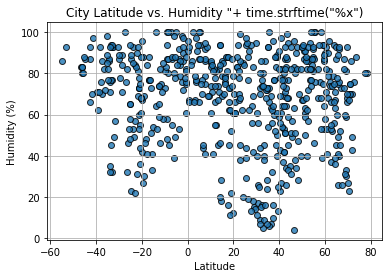

In [38]:
# Build scatter plot for Latitude vs Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity "+ time.strftime("%x")')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Plot Latitude vs Couldiness

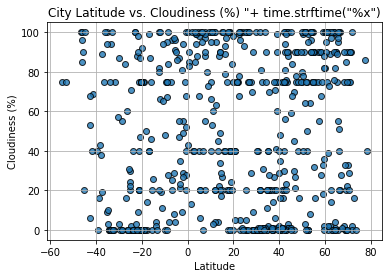

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) "+ time.strftime("%x")')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Plot Latitude vs Wind Speed

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed (%) "+ time.strftime("%x")')
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()